#<font color='navy' size=6pt> Supervised Machine Learning: Regression Problems

##<font color='blue' size=5pt> Introduction

**Main Idea**:
 - the output (dependent) variable is continuous and we want to "predict" its value within the range of the input features. (<font color='red'>WARNING: doing otherwise could lead to flawed inferences</font>).
 - there is "noise" which means that for essentially the same input values there may be different slightly different values of the output variable or there is "noise" in the measurement of all the variables.  
 - we assume that the noise (i.e. the errors in measurement) are following a normal distribution with mean 0 and some unknown standard deviation.

**Main Approach**:
- we want to estimate the expected value of the dependent variable as a function of the input features. Thus we want to approximate a conditional expectation $\mathbb{E}(Y|\text{input features})$ as a function of the input features such as $$\mathbb{E}(Y|X=x) = f(x)$$

- we want to determine the simplest form of the function $f$ (principle of parsimony) and we assume that $$Y = f(X) + \sigma \epsilon$$ where $\epsilon$ is the "noise", in statistical terms, $\epsilon$ is independent and identically distributed, it follows a standard normal distribution and, $\sigma>0$ is generally unknown.


## <font color='blue' size=5pt>Ordinary Least Squares Regression (OLS)</font>

First, we assume the simplest case: data has only one input feature that is continuous.

The main idea of linear regression is the expected value of the output is a linear function of the input variable(s).

$$\mathbb{E}(Y|X=x)\approx m\cdot x + b$$

To determine the line of best fit the goal is to minimize the sum of squared residuals:

<font color='navy'>
$$
\min_{m,b} \sum\limits_{i=1}^{n}(y_i-mx_i-b)^2
$$
</font>

So the sum of the squared residuals is

$$
\sum\limits_{i=1}^{n}(y_i-mx_i-b)^2
$$

If $N$ represents the number of observations (the number of rows in the data) then the cost function may be defined
<font color='red'>
$$
L(m,b) = \frac{1}{N} \sum\limits_{i=1}^{N}(y_i-mx_i-b)^2
$$</font>

where

$$\hat{y_i} = m_\cdot x_i +b.$$

If we get our predictions $\hat{y}_i$ then we have that the Mean Squared Error is

$$
\frac{1}{N} \sum\limits_{i=1}^{N}(y_i-\hat{y}_i)^2
$$

<font color='forestgreen'> Critical Thinking: at the optimal values $(m,b)$ the partial derivatives of the cost function $L$ are equal to 0.</font>

The <font color='deepskyblue'>*gradient descent algorithm*</font> is based on this idea.


Thus, the equation of the best fit line is $$y = mx + b.$$

<font color='red'> CRITICAL THINKING: How *exactly* are we obtaining the slope and the intercept?</font>

<font color='forestgreen'>ANSWER: One way to obtain the slope and the intercept is by applying the *Ordinary Least Squares* method.</font>

We determine the values of <font color='blue'>$m$</font> and <font color='red'>$b$</font> such that the sum of the square distances between the points and the line is *minimal*.</font>

<figure>
<center>
<img src='https://drive.google.com/uc?id=16s5RAyNsFB17nut3jJMqPsPxmbLC_wP2'
width='640px' />
<figcaption>Source: Simple Linear Regression (Tobias Roeschl)</figcaption></center>
</figure>



##<font color='blue' size=5pt> Linear Correlation and Real Data Application

In the following example we learn how to write a code in Python for determining the line of best fit given one dependent variable and one input feature. That is to say we are going to determine a slope  𝑚  and an intercept  𝑛 , the equation of the best fit line being  𝑦=𝑚𝑥+𝑏.

We are going to analyze a real data set that was extracted from the 1974 Motor Trend US magazine and comprises fuel consumption and 10 aspects of automobile design and performance for 32 automobiles (1973-1974 models).

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 120
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
sns.set(color_codes=True)

# import uniform distribution
from scipy import stats
from scipy.stats import norm
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse

In [ ]:
cars = pd.read_csv('drive/MyDrive/Data Sets/mtcars.csv')

In [ ]:
cars

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


**Objective 1**: We want to to know if there is any association between the weight of the car and the mileage.

In [ ]:
cars['mpg'].values

array([21. , 21. , 22.8, 21.4, 18.7, 18.1, 14.3, 24.4, 22.8, 19.2, 17.8,
       16.4, 17.3, 15.2, 10.4, 10.4, 14.7, 32.4, 30.4, 33.9, 21.5, 15.5,
       15.2, 13.3, 19.2, 27.3, 26. , 30.4, 15.8, 19.7, 15. , 21.4])

In [ ]:
y = cars.mpg.values
x = cars.wt.values

In [ ]:
x

array([2.62 , 2.875, 2.32 , 3.215, 3.44 , 3.46 , 3.57 , 3.19 , 3.15 ,
       3.44 , 3.44 , 4.07 , 3.73 , 3.78 , 5.25 , 5.424, 5.345, 2.2  ,
       1.615, 1.835, 2.465, 3.52 , 3.435, 3.84 , 3.845, 1.935, 2.14 ,
       1.513, 3.17 , 2.77 , 3.57 , 2.78 ])

## Relationship between x and y

In [ ]:
y = cars['mpg'].values
x = cars['wt'].values

In [ ]:
xb, yb = np.mean(x) , np.mean(y) # here we compute the center of mass

In [ ]:
xb

3.2172500000000004

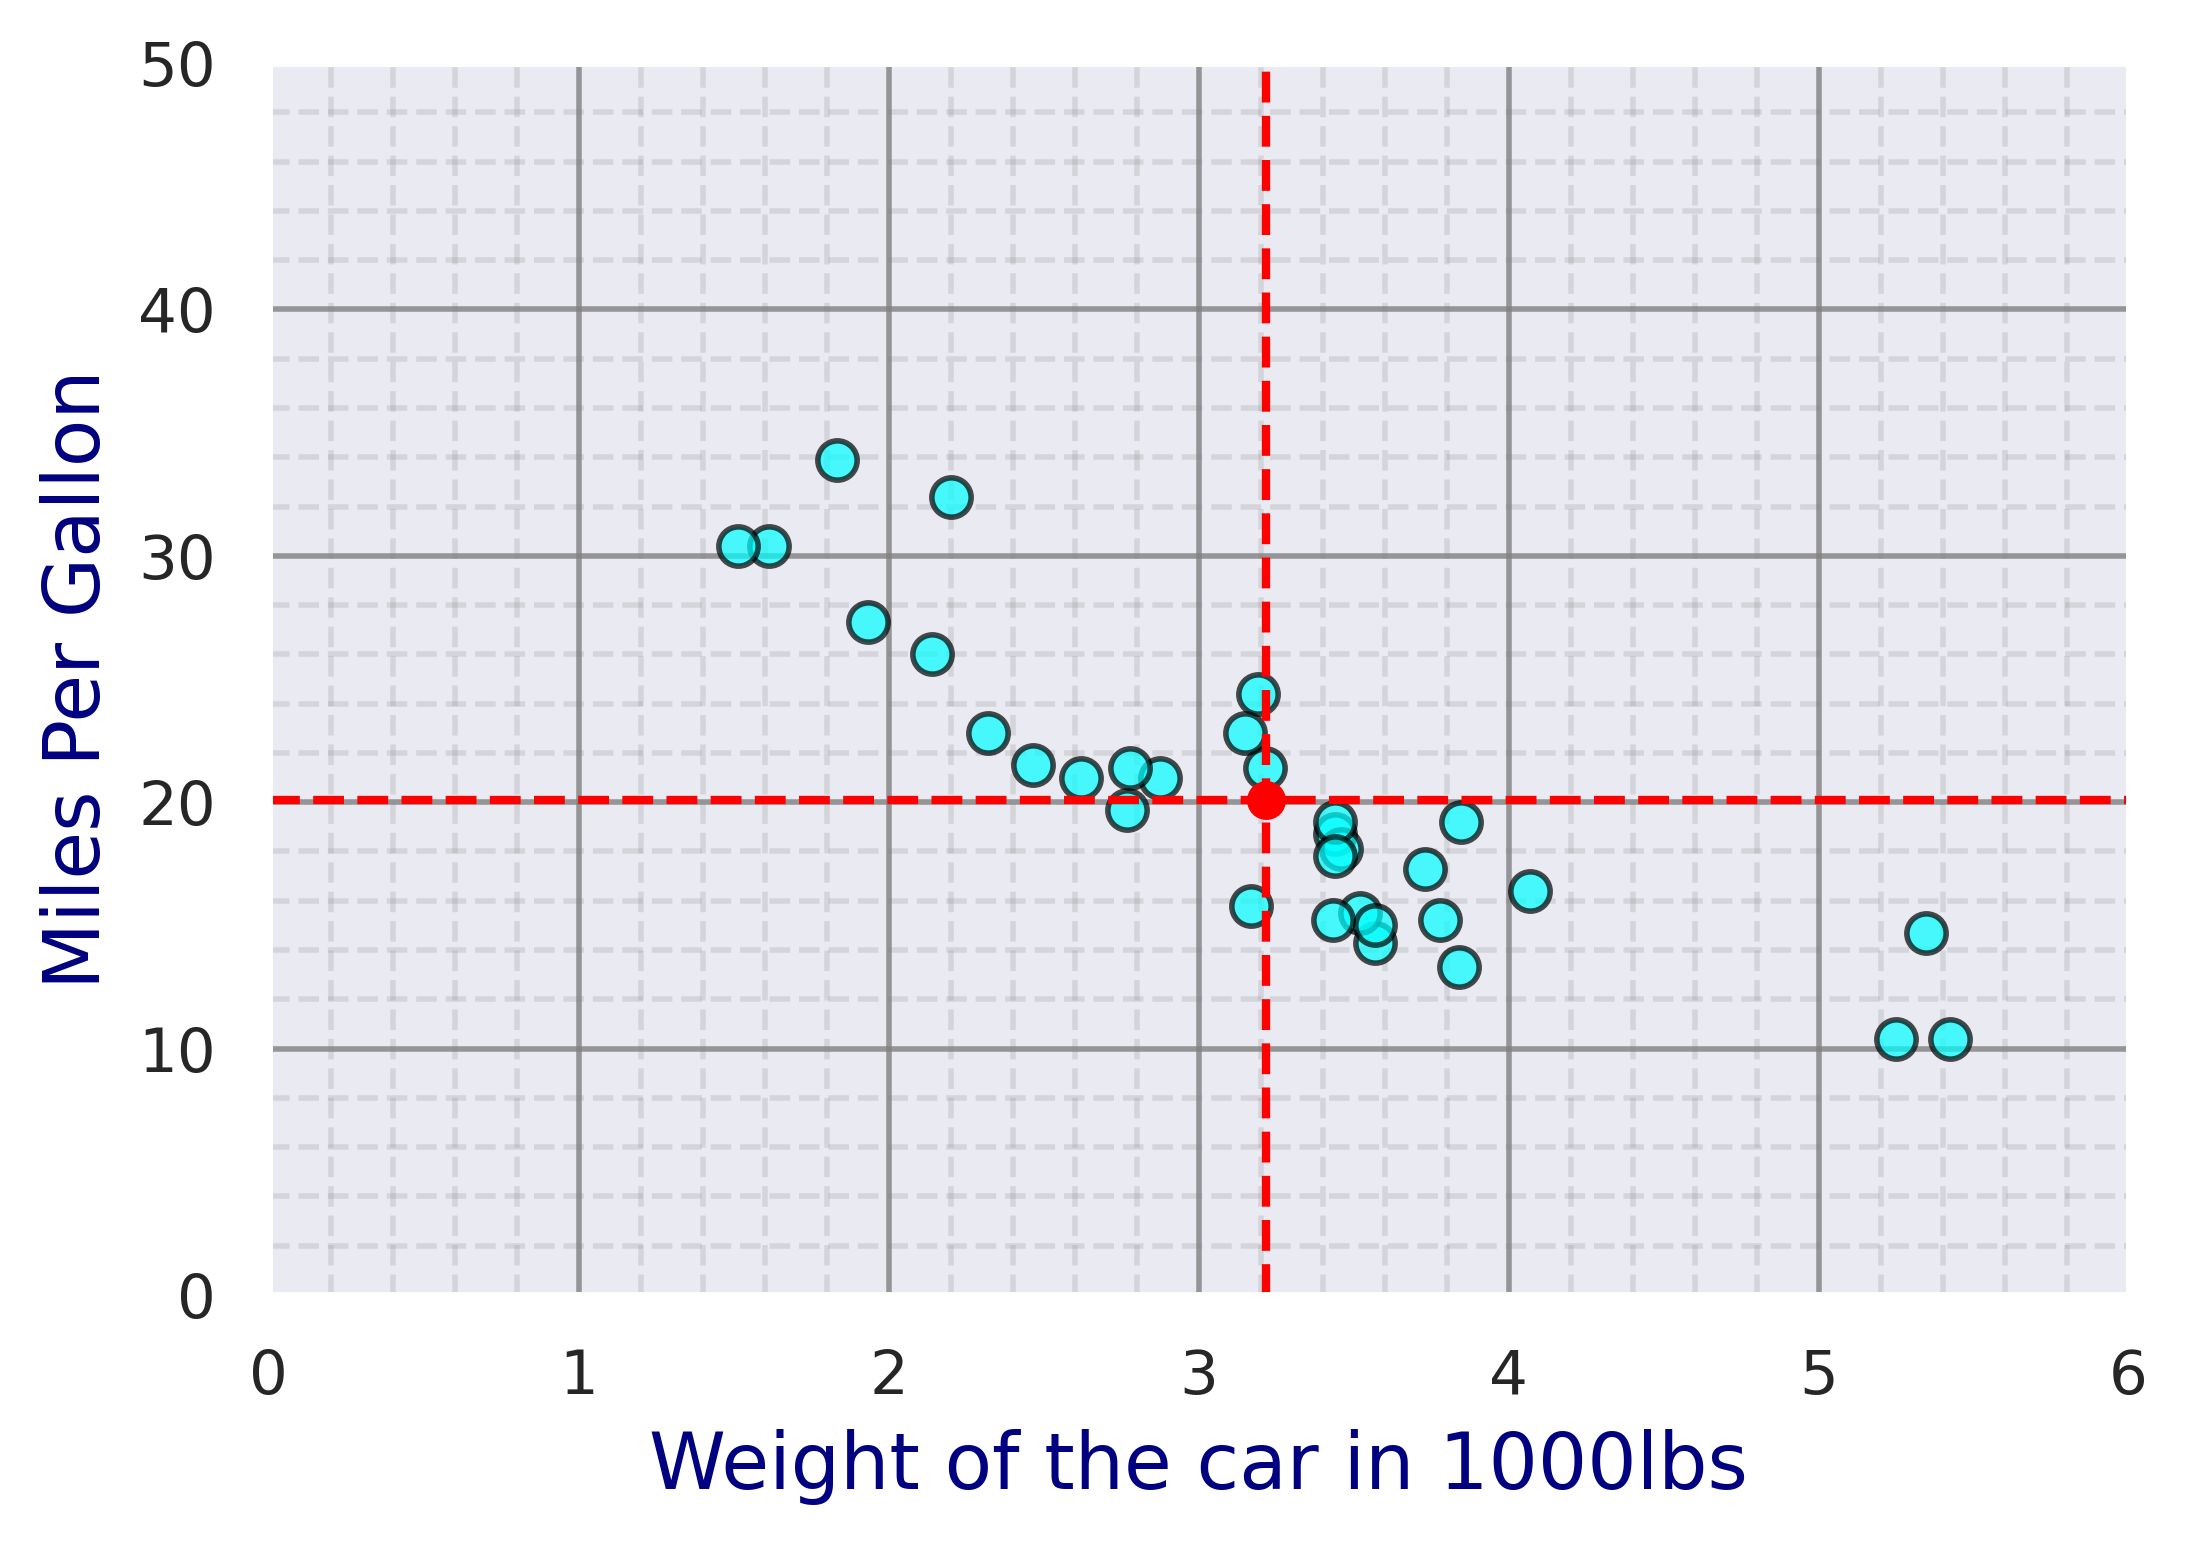

In [ ]:
fig, ax = plt.subplots(figsize=(6,4),dpi=200)
ax.scatter(x,y,color='cyan',s=50,ec='black',alpha=0.7)
ax.scatter(xb,yb,color='red')
ax.set_xlim(0, 6)
ax.set_ylim(0, 50)
ax.set_xlabel('Weight of the car in 1000lbs',fontsize=14,color='navy')
ax.set_ylabel('Miles Per Gallon',fontsize=14,color='navy')
ax.grid(which='major', color ='grey', linestyle='-', alpha=0.8)
ax.grid(which='minor', color ='grey', linestyle='--', alpha=0.2)
plt.axvline(x=xb, color='red',linestyle='dashed')
plt.axhline(y=yb, color='red',linestyle='dashed')
plt.tick_params(axis='x', color='navy')
plt.tick_params(axis='y', color='navy')
ax.minorticks_on()
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# here we make x a column vector or a matrix
x = x.reshape(-1,1) #technical

In [ ]:
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [ ]:
m = model.coef_
b = model.intercept_

In [ ]:
print('The Slope is :'+str(m),' and the intercept is :' +str(b))

The Slope is :[-5.34447157]  and the intercept is :37.28512616734204


In [ ]:
model.score(x,y)

0.7528327936582646

**Observation**: Based on the scatter plot and the position of the center of mass we infer that the dependent variable (MPG) is expected to drop when the input feature (Weight) increases.

The linear correlation coefficient is defined (Pearson, Karl (20 June 1895). "Notes on regression and inheritance in the case of two parents". Proceedings of the Royal Society of London. 58: 240–242.)

$$\large r: = \frac{1}{n-1}\sum_{i=1}^{n} \left(\frac{x_i - \bar{x}}{s_x}\right)\left(\frac{y_i - \bar{y}}{s_y}\right)$$

Here $\bar{x}$ is the mean of $x$, $\bar{y}$ is the mean of $y$ and, $s_x$ is the standard deviation of $x$ and $s_y$ is the standard deviation of $y.$


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from scipy.stats import pearsonr

In [ ]:
# we have to "ravel" back the x
x = x.ravel()

In [ ]:
r, pval = pearsonr(x,y)
print('The correlation coefficient is :'+str(r)+'  and the pvalue for significance is :'+str(pval))

The correlation coefficient is :-0.8676593765172278  and the pvalue for significance is :1.293958701350513e-10


### Test statistic for the corelation coefficient:

$$\large t=\frac{r\sqrt{n-2}}{\sqrt{1-r^2}}$$

where $n$ is the number of observations and $r$ represents the correlation coefficient computed from the data.

The slope of the regression line is

$$\large m:= r\cdot\frac{s_y}{s_x}$$

In [ ]:
m = r*np.std(y)/np.std(x)

In [ ]:
print('The slope of the trend is :' +str(m))

The slope of the trend is :-5.344471572722676


The equation of the line passing through the center of mass and that captires the trend is:
$$y-\bar{y} = m\cdot(x-\bar{x})$$

In short, $$y=m\cdot x + b$$ where $b = \bar{y} -m\cdot\bar{x}$

In [ ]:
b = yb-m*xb
print('In our case the intercept is: ' +str(b)) # what is the meaning of the intercept?

In our case the intercept is: 37.285126167342035


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# what is the shape of x?
x.shape

(32,)

In [ ]:
model = LinearRegression()
model.fit(x.reshape(-1,1),y)

LinearRegression()

In [ ]:
model.coef_ , model.intercept_ # this is what the has learned

(array([-5.34447157]), 37.28512616734204)

In [ ]:
x_range = np.linspace(np.min(x) - 0.2,np.max(x) + 0.2,2)
yhat = model.predict(x_range.reshape(-1,1))

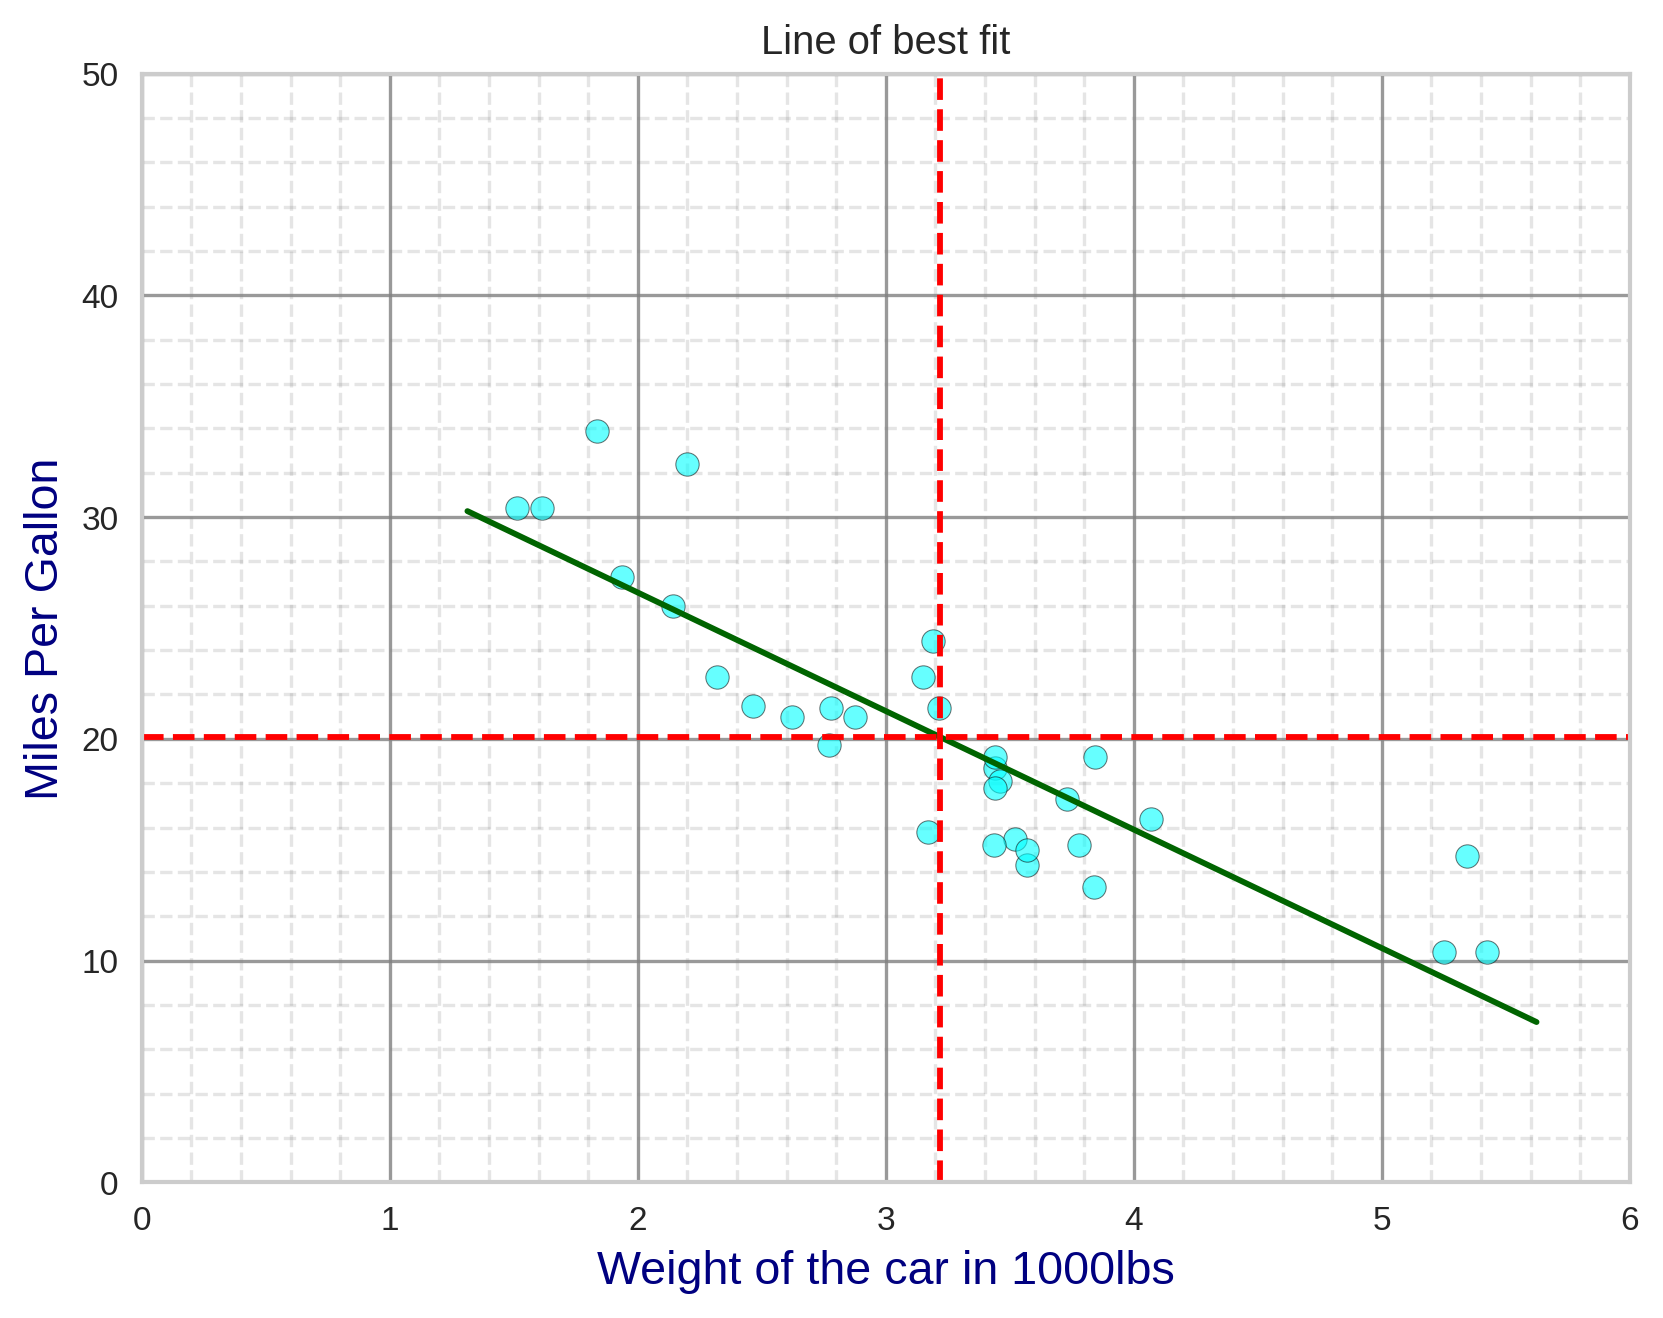

In [ ]:
#Plot dataset
plt.figure(figsize=(8,6))
plt.scatter(x, y,ec='k',color='cyan',alpha=0.6)
#Predict y values
pred = m * x_range + b
#Plot predictions as line of best fit
plt.plot(x_range, pred, c='darkgreen')
plt.xlim(0, 6)
plt.ylim(0, 50)
plt.xlabel('Weight of the car in 1000lbs',fontsize=14,color='navy')
plt.ylabel('Miles Per Gallon',fontsize=14,color='navy')
plt.grid(which='major', color ='grey', linestyle='-', alpha=0.8)
plt.grid(which='minor', color ='grey', linestyle='--', alpha=0.2)
plt.axvline(x=xb, color='red',linestyle='dashed')
plt.axhline(y=yb, color='red',linestyle='dashed')
plt.tick_params(axis='x', color='navy')
plt.tick_params(axis='y', color='navy')
plt.minorticks_on()
plt.title('Line of best fit')
plt.show()

##<font color='red' size=6pt> Diagnostics for Regression
### <font color='blue' size=5pt> The Coefficient of Determination

$$\large R^2:=1-\frac{\sum (residual_i)^2}{\sum(y_i-\bar{y})^2}$$

We know we make a good job when R2 is very close to 1. We make a very poor job if R2 is close to 0 or even negative.

## <font color='navy' size=5pt> Metrics for Errors

### <font color='blue' size=5pt> MSE

$$\text{MSE}:=\frac{1}{n}\sum_{i=1}^{n}(y_i-x_i\cdot\vec{\beta})^2$$

here the i-th observation has multiple features:

$$x_i = \left(x_{i1},x_{i2},...x_{ip}\right)$$

where the "dot" product is defined as

$$x_i\cdot\vec{\beta} = \sum_{j=1}^{p} x_{ij}\beta_j$$

### <font color='blue' size=5pt> RMSE

Root mean squared error:

$$\text{RMSE}:=\left(\frac{1}{n}\sum_{i=1}^{n}(y_i-x_i\cdot\vec{\beta})^2\right)^{1/2}$$

### <font color='blue' size=5pt> MAE

Mean absolute error:

$$\text{MAE}:=\frac{1}{n}\sum_{i=1}^{n}\left|y_i-x_i\cdot\vec{\beta}\right|$$

In [ ]:
model.score(x.reshape(-1,1),y)

0.7528327936582646

In [ ]:
r**2

0.7528327936582647

##<font color='blue' size=5pt>Test the Residuals for Goodness of fit</font>

We investigate the distribution of the residuals, plot a histogram and apply a normality test

In [ ]:
residuals = y - model.predict(x.reshape(-1,1))

In [ ]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# import uniform distribution
from scipy import stats
from scipy.stats import norm

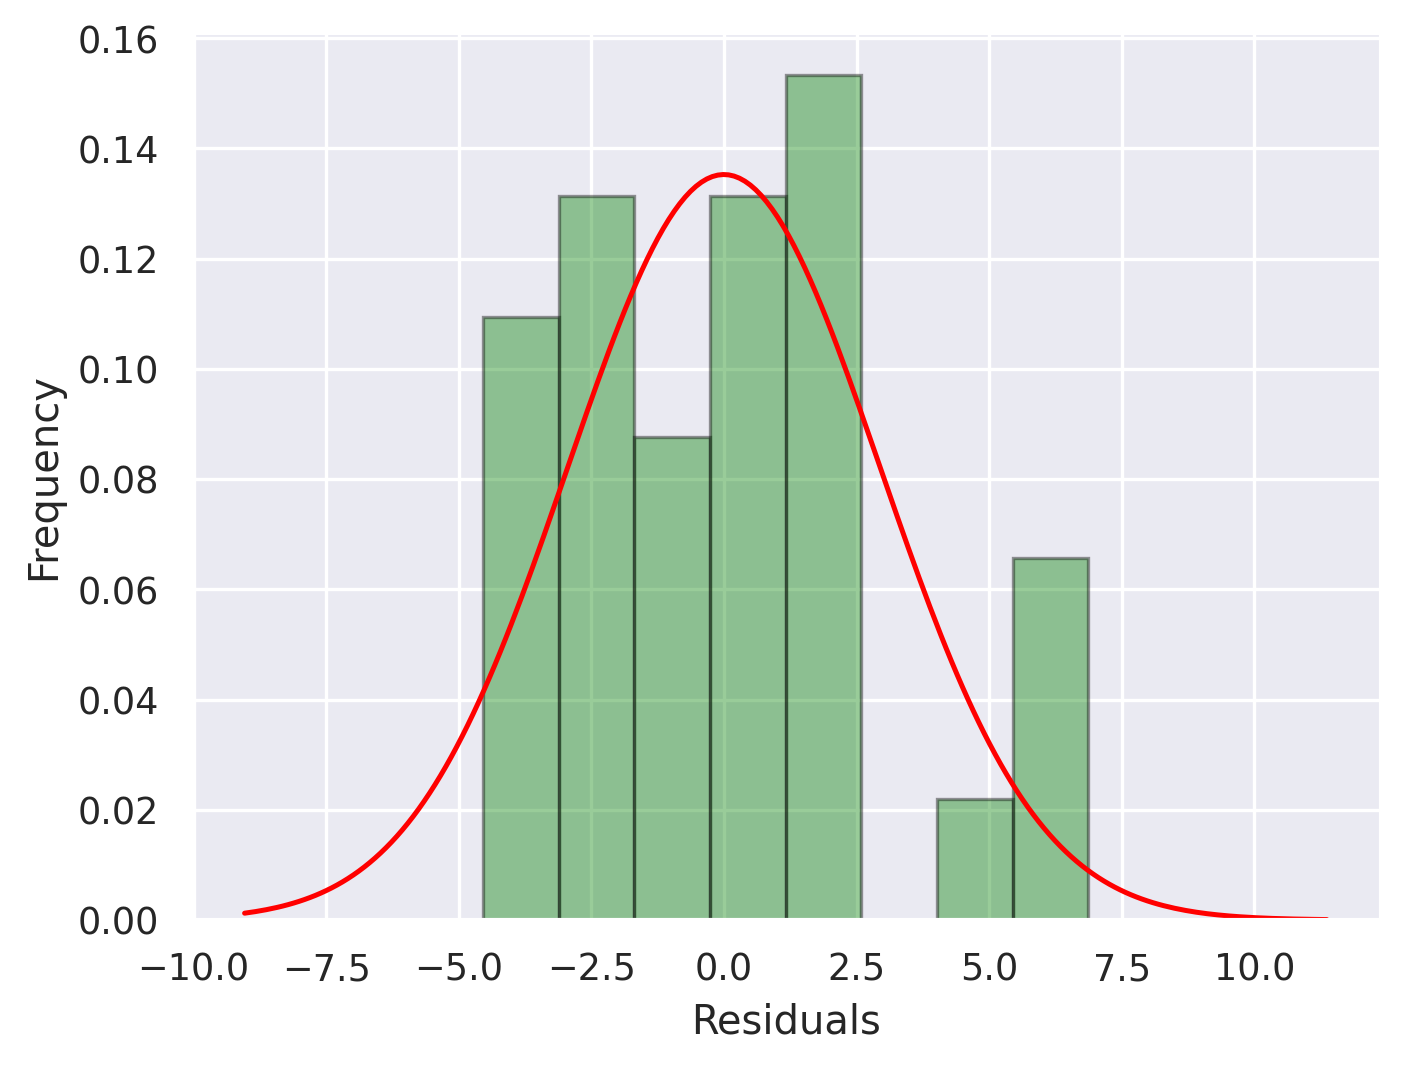

In [ ]:
ax1 = sns.distplot(residuals,

                  bins=8,
                  kde=False,
                  color='deepskyblue',
                  hist_kws={"color":'green','ec':'black'},
                  fit=stats.norm,
                  fit_kws={"color":'red'})
ax1.set(xlabel='Residuals', ylabel='Frequency')
plt.show()

### Message: The histogram does not quite look like a normal distribution. We can also consider a Q-Q Plot:

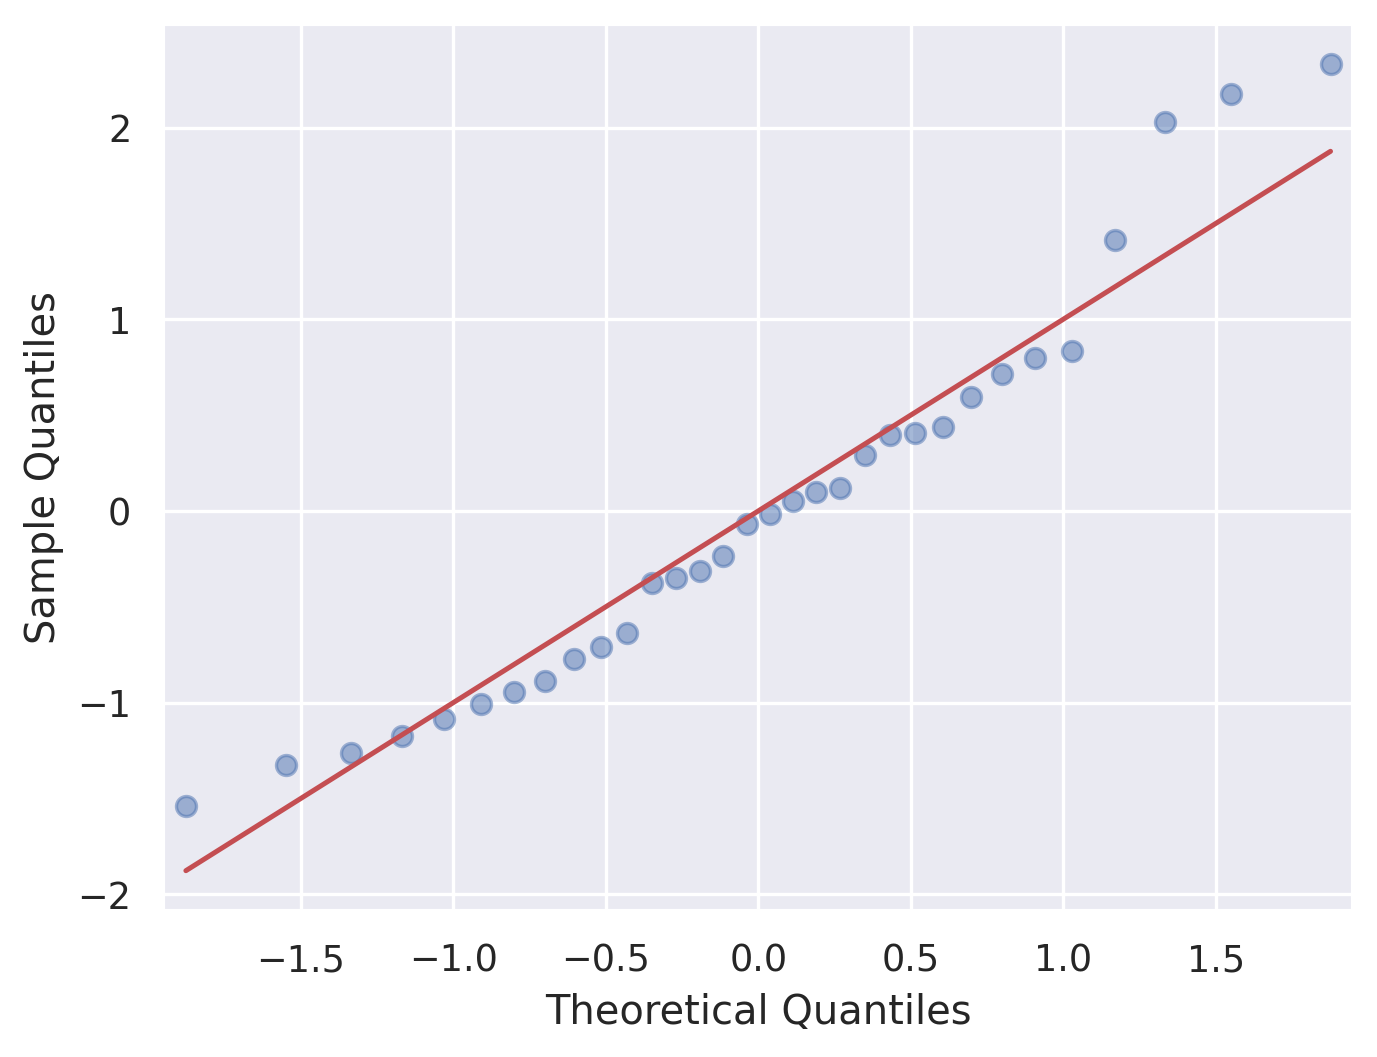

In [ ]:

#plt.xlim([-2.5,2.5])
#plt.ylim([-2.5,2.5])
#plt.axes().set_aspect('equal')
#plt.grid(which='major', color ='grey', linestyle='-', alpha=0.5)
#plt.grid(which='minor', color ='grey', linestyle='--', alpha=0.15)
#plt.minorticks_on()
sm.qqplot(residuals/np.std(residuals), loc = 0, scale = 1, line='s',alpha=0.5)
plt.show()

### Test Statistic for the Kolmogorov-Smirnov test is:

$$\sup |EDF(x) - CDF(x)|$$

Here $$EDF(x)$$ means the emprirical distribution function:

$$EDF(x):= \frac{1}{n}\sum \mathbb{1}(t)_{t<x}$$

we add $1$ for each $t$ less than $x$.

ALso, $CDF$ stands for the cummulative distribution function:

$$CDF(x):= \int_{-\infty}^{x}f(t)dt$$ where $f$ is the probability density function.

If the p-value is high (much greater then 5%) we do not reject the null hypethesis which means that the normality assumption is not violated.

In [ ]:
dist = getattr(stats, 'norm')
params = dist.fit(residuals)

In [ ]:
params

(-8.215650382226158e-15, 2.949162685955028)

In [ ]:
# here we apply the test
stats.kstest(residuals, "norm", params)

KstestResult(statistic=0.08217402470387336, pvalue=0.9698176646662029, statistic_location=-1.8830236224503238, statistic_sign=1)

### The conclusion, in our case, is that the normality assumption is not violated.

### Another normality test indicates the same thing

In [ ]:
stats.anderson(residuals,dist='norm')

AndersonResult(statistic=0.46842144463906266, critical_values=array([0.523, 0.596, 0.715, 0.834, 0.992]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=-8.215650382226158e-15, scale=2.9963522852840923)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [ ]:
#@title
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

## <font color='blue'>Multiple Linear Regression (Linear models with more features)</font>

**Important** The matrix vector product is a linear combination of the columns of the matrix:

$$\large X\beta =\beta_1\begin{bmatrix}
           x_{11} \\
           x_{21} \\
           \vdots \\
           x_{n1}
         \end{bmatrix}
         +
         \beta_2\begin{bmatrix}
           x_{11} \\
           x_{21} \\
           \vdots \\
           x_{n1}
         \end{bmatrix}
                  + ...
         \beta_p\begin{bmatrix}
           x_{1p} \\
           x_{2p} \\
           \vdots \\
           x_{np}
         \end{bmatrix}
$$
where

$$\large X = \begin{bmatrix}
x_{11}, x_{12} ... x_{1p} \\
x_{21},x_{22}, ...x_{2p} \\
\vdots \\
x_{n1}, x_{n2}, ... x_{np}
\end{bmatrix}
$$

An example of a linear model with two features is $\hat{y}_i = 1+3x_{i1}+5x_{i2}.$

In this example the value $1$ is referred to as the *intercept*.


If $p$ features in the data and we want to create a linear model, the *input-output* mechanism is

$$
\underbrace{Y}_\text{Output}  = \underbrace{\beta_1 X_1+\beta_2 X_2+...+\beta_p X_p}_\text{Linear combination of features}
$$

This could represented as a matrix-vector product:

$$
\underbrace{Y}_\text{Output}  = \underbrace{X\cdot \beta}_\text{Linear combination of the columns of matrix X}
$$

In this model the input features are vectors, $X_1, X_2, ...X_p$ and $\beta_1, \beta_2,...\beta_p$ are a set of weights (real numbers).

## <font color='blue'> Vector Spaces </font>

| **Axiom**                                                                                                                                | **Meaning**                                                                                                                                                                                                  |
| ---------------------------------------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| [Associativity](https://en.wikipedia.org/wiki/Associativity "Associativity") of vector addition                                          | **u** + (**v** + **w**) = (**u** + **v**) + **w**                                                                                                                                                            |
| [Commutativity](https://en.wikipedia.org/wiki/Commutativity "Commutativity") of vector addition                                          | **u** + **v** = **v** + **u**                                                                                                                                                                                |
| [Identity element](https://en.wikipedia.org/wiki/Identity_element "Identity element") of vector addition                                 | There exists an element **0**∈ _V_, called the _[zero vector](https://en.wikipedia.org/wiki/Zero_vector "Zero vector")_, such that **v** + **0** = **v** for all **v**∈ _V_.                                 |
| [Inverse elements](https://en.wikipedia.org/wiki/Inverse_element "Inverse element") of vector addition                                   | For every **v**∈ _V_, there exists an element −**v** ∈ _V_, called the _[additive inverse](https://en.wikipedia.org/wiki/Additive_inverse "Additive inverse")_ of **v**, such that **v** + (−**v**) = **0**. |
| Compatibility of scalar multiplication with field multiplication                                                                         | _a_(_b_**v**) = (_ab_)**v**<sup>[\[nb 3\]](https://en.wikipedia.org/wiki/Vector_space#cite_note-4)</sup>                                                                                                     |
| Identity element of scalar multiplication                                                                                                | 1**v** = **v**, where 1 denotes the [multiplicative identity](https://en.wikipedia.org/wiki/Multiplicative_identity "Multiplicative identity") in _F_.                                                       |
| [Distributivity](https://en.wikipedia.org/wiki/Distributivity "Distributivity") of scalar multiplication with respect to vector addition | _a_(**u** + **v**) = _a_**u** + _a_**v**                                                                                                                                                                     |
| Distributivity of scalar multiplication with respect to field addition                                                                   | (_a_ + _b_)**v** = _a_**v** + _b_**v**                    

## <font color='blue'>Linear vs Non-linear models</font>

This is a linear model in terms of the weights $\beta$:


$$\large
\hat{y} = \beta_0 + \beta_1x_1 + \beta_2x_2 - \beta_3x_3
$$

An example for what linear in weights means
<font color='forestgreen'>
$$
\hat{y}(2\beta+3\alpha) = 2\hat{y}(\beta)+3\hat{y}(\alpha)
$$</font>

The following is a non-linear model in terms of the coefficients (weights):


$$\large
\hat{y} = \beta_0 + \beta_1^3x_1 + \frac{1}{\beta_2+\beta_3}x_2 - e^{\beta_3}x_3
$$

<font color='magenta'>
$$
\hat{y}(2\beta+3\alpha) \neq 2\hat{y}(\beta)+3\hat{y}(\alpha)
$$</font>

The main point of linear regression is to assume that predictions can ben made by using a linear combination of the features.

For example, if the data from feature $j$ is
$$
\begin{bmatrix}
x_{1j} \\
x_{2j} \\
\vdots \\
x_{nj}
\end{bmatrix}
$$
then we assume that the depdendent variable is predicted by a linear combination of these columns populated with features' data. Each column represents a feature and each row an independent observation.

The predicted value is denoted by $\hat{y}$ and


$$
\hat{y} = \beta_1\begin{bmatrix}
           x_{11} \\
           x_{21} \\
           \vdots \\
           x_{n1}
         \end{bmatrix}
         +
         \beta_2\begin{bmatrix}
           x_{11} \\
           x_{21} \\
           \vdots \\
           x_{n1}
         \end{bmatrix}
                  + ...
         \beta_p\begin{bmatrix}
           x_{1p} \\
           x_{2p} \\
           \vdots \\
           x_{np}
         \end{bmatrix}
$$

### We have a vector of weights:

$$
\beta = \begin{bmatrix}
           \beta_{1} \\
           \beta_{2} \\
           \vdots \\
           \beta_{p}
         \end{bmatrix}
$$

### <font color="forestgreen">
Critical thinking: what exactly is $\hat{y}$?
</font>

<font color='magenta'> The matrix-vector product between the feaures and the weights
$$
\hat{y} = X\cdot\beta
$$
</font>

The main idea is that

$$
\hat{y}= \begin{bmatrix}
           \hat{y}_{1} \\
            \hat{y}_{2}  \\
           \vdots \\
             \hat{y}_{n}
         \end{bmatrix}
$$

represents the predictions we make by training (or as we say in ML *learning*) the weights $\beta.$

Training means running an optimization algorithm and determining the values of the weights that minimize an objective function.

### <font color='darkgreen'> We want to *learn* the weights $\beta_1,\beta_2,...\beta_p$ that minimize the sum of the squared residuals:

$$\large
\sum\limits_{i=1}^{n}\left(y_i-\sum\limits_{j=1}^{p}X_{i,j}\cdot\beta_j\right)^2
 = \sum\limits_{i=1}^{n}\left(y_i-X_{i,1}\beta_1-X_{i,2}\beta_2 - ...X_{i,p}\beta_p\right)^2 $$
</font>

### <font color='red'> How do we know we are on the right track after we perform the minimization of the square residuals? <font>

In [ ]:
x = cars.iloc[:,2:8]

In [ ]:
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
model.score(x,y)

0.8548224115848234

In [ ]:
residuals = y - model.predict(x)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


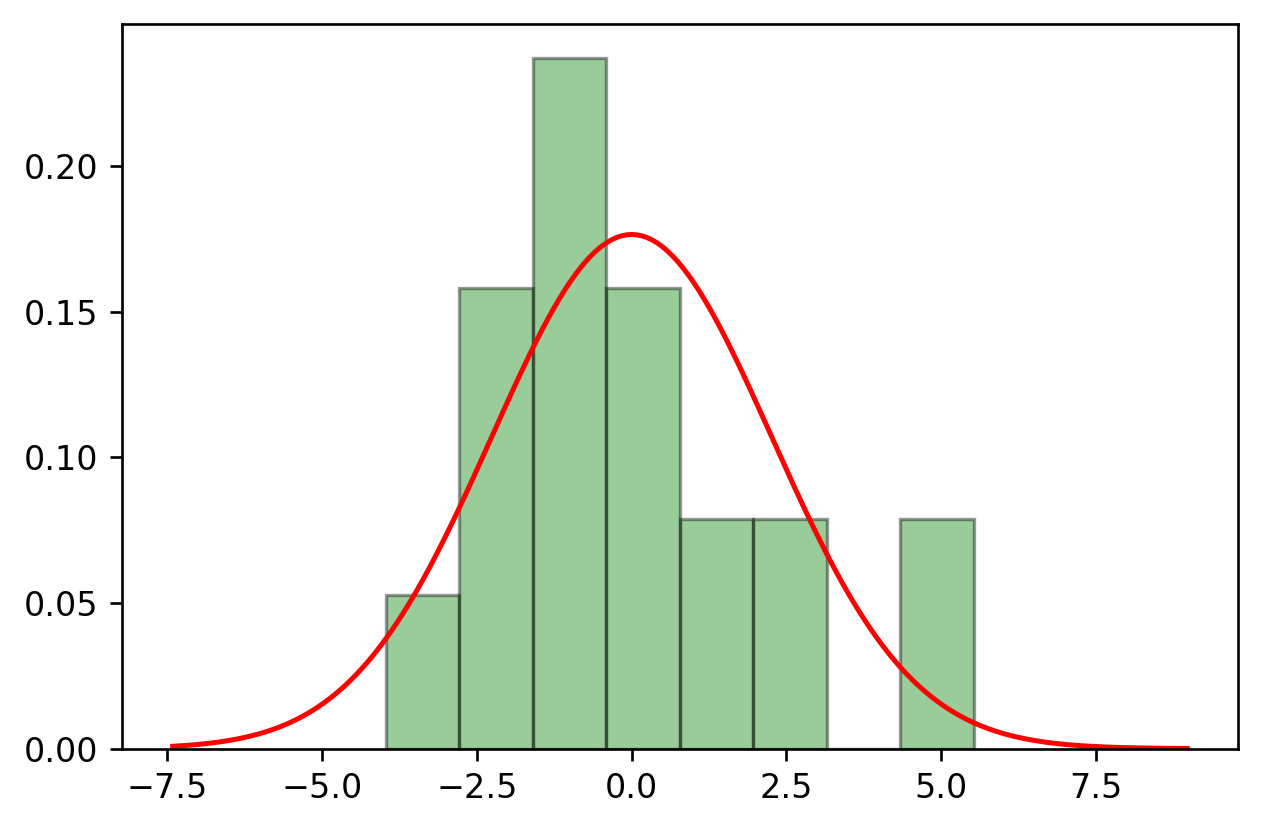

In [ ]:
sns.distplot(residuals,
                  bins=8,
                  kde=False,
                  color='deepskyblue',
                  hist_kws={"color":'green','ec':'black'},
                  fit=stats.norm,
                  fit_kws={"color":'red'})
plt.show()

In [ ]:
dist = getattr(stats, 'norm')
params = dist.fit(residuals)

In [ ]:
# here we apply the Kolmogorov-Smirnov test
stats.kstest(residuals, "norm", params) # the confidence has increased compared to the case of using only one input feature.

KstestResult(statistic=0.15722261669146254, pvalue=0.37091468826166857)

## <font color='navy'> When Multiple Linear Regression Fails

Plain *vanilla* multiple linear regression (OLS) fails if the number of observations is smaller than the number of features.


Example: If the dependent variable is the Sales Price, we cannot uniquely determine the weights for the features if we have only 4 observations.


    Dist to School     Property Area       Housing Area         Value       Property Tax     Bathrooms   Sales Price   
------------------  ----------------      -------------      --------      -------------   -----------  ------------
              7.0               0.4               1800           234                9.8            2.0         267.5
              2.3               0.8               1980           244               10.5            2.5         278.2
              4.3               1.1               2120           252               16.2            3.0         284.5
              3.8               0.6               2500           280               18.4            3.5         310.4
              

In [ ]:
df1

,Dist. to School,Prop. Area,Housing Area,Value,Prop. Tax,Bathrooms,Sales Price
0,7.0,0.4,1800,234,9.8,2.0,267.5
1,2.3,0.8,1980,244,10.5,2.5,278.2
2,4.3,1.1,2120,252,16.2,3.0,284.5
3,3.8,0.6,2500,280,18.4,3.5,310.4


In [ ]:
Xf = df1.values
X = Xf[:,:-1]
y = Xf[:,-1]

In [ ]:
X

array([[7.00e+00, 4.00e-01, 1.80e+03, 2.34e+02, 9.80e+00, 2.00e+00],
       [2.30e+00, 8.00e-01, 1.98e+03, 2.44e+02, 1.05e+01, 2.50e+00],
       [4.30e+00, 1.10e+00, 2.12e+03, 2.52e+02, 1.62e+01, 3.00e+00],
       [3.80e+00, 6.00e-01, 2.50e+03, 2.80e+02, 1.84e+01, 3.50e+00]])

In [ ]:
X.shape

(4, 6)

In [ ]:
np.transpose(X)

array([[7.00e+00, 2.30e+00, 4.30e+00, 3.80e+00],
       [4.00e-01, 8.00e-01, 1.10e+00, 6.00e-01],
       [1.80e+03, 1.98e+03, 2.12e+03, 2.50e+03],
       [2.34e+02, 2.44e+02, 2.52e+02, 2.80e+02],
       [9.80e+00, 1.05e+01, 1.62e+01, 1.84e+01],
       [2.00e+00, 2.50e+00, 3.00e+00, 3.50e+00]])

In [ ]:
M = np.transpose(X).dot(X) # this is how we compute the object X^T*X

In [ ]:
M

array([[8.72200e+01, 1.16500e+01, 3.57700e+04, 4.34680e+03, 2.32330e+02,
        4.59500e+01],
       [1.16500e+01, 2.37000e+00, 6.13600e+03, 7.34000e+02, 4.11800e+01,
        8.20000e+00],
       [3.57700e+04, 6.13600e+03, 1.79048e+07, 2.13856e+06, 1.18774e+05,
        2.36600e+04],
       [4.34680e+03, 7.34000e+02, 2.13856e+06, 2.56196e+05, 1.40896e+04,
        2.81400e+03],
       [2.32330e+02, 4.11800e+01, 1.18774e+05, 1.40896e+04, 8.07290e+02,
        1.58850e+02],
       [4.59500e+01, 8.20000e+00, 2.36600e+04, 2.81400e+03, 1.58850e+02,
        3.15000e+01]])

In [ ]:
np.linalg.det(M) # this show that M is NOT invertible!!

0.0

In [ ]:
np.linalg.det(M+0.000001*np.eye(len(M)))

0.6134753533848759

In [ ]:
np.linalg.inv(M+0.0001*np.eye(len(M))).dot(M)

array([[ 9.61854858e-01, -1.75933510e-01, -1.06314781e-03,
         8.36576045e-03,  4.24339557e-02, -6.20522817e-02],
       [-1.75933511e-01,  7.48903637e-02, -5.73345534e-03,
         4.27898670e-02,  1.88499974e-01,  3.05122126e-02],
       [-1.06221967e-03, -5.73309866e-03,  9.99964276e-01,
         2.63929889e-04,  1.12862665e-03,  6.02998033e-04],
       [ 8.36587051e-03,  4.27899073e-02,  2.63963068e-04,
         9.98009046e-01, -9.03963543e-03,  1.86103684e-03],
       [ 4.24339621e-02,  1.88499976e-01,  1.12870602e-03,
        -9.03962599e-03,  9.52312434e-01,  8.93285243e-02],
       [-6.20522807e-02,  3.05122129e-02,  6.02881672e-04,
         1.86102090e-03,  8.93285233e-02,  1.29324989e-02]])

In [ ]:
# we can apply the Moore-Penrose pseudo-inverse
beta = np.linalg.inv(M+0.001*np.eye(len(M))).dot(np.transpose(X).dot(y))

In [ ]:
beta

array([-0.71851108,  0.27602504, -0.04422342,  1.48978604,  0.33049367,
        0.0863962 ])

In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression

In [ ]:
model = Ridge(alpha=0.001,fit_intercept=False)
model.fit(X,y)
model.coef_

array([-0.71851109,  0.27602501, -0.04422342,  1.48978604,  0.33049367,
        0.0863962 ])

$$\large M\cdot \vec{\beta} = \beta_1*col_1(M)+\beta_2*col_2(M)+...\beta_p*col_p(M)$$

### Message: if the determinant of X^T * X is zero then we have a rank deficient situation and multiple regression via OLS is NOT working !!!!!

In [ ]:
lm = LinearRegression()
model1 = lm.fit(X,y)

In [ ]:
model1.coef_ # these coefficients are "fake news"

array([ 0.05403601, -0.08762454,  0.03884158,  0.43500068, -0.46942783,
       -0.04774555])

In [ ]:
import statsmodels.api as sm

In [ ]:
model = sm.OLS(y, X,)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 24 Mar 2023   Prob (F-statistic):                nan
Time:                        18:07:54   Log-Likelihood:                 102.26
No. Observations:                   4   AIC:                            -196.5
Df Residuals:                       0   BIC:                            -199.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.7187        inf         -0        n

/usr/local/lib/python3.9/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/usr/local/lib/python3.9/dist-packages/statsmodels/regression/linear_model.py:1765: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.9/dist-packages/statsmodels/regression/linear_model.py:1765: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.9/dist-packages/statsmodels/regression/linear_model.py:1687: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


In [ ]:
# here we compute the determinant of X^t *X and show it is 0
np.linalg.det(np.transpose(X).dot(X))

0.0

## <font color= 'blue'> What does Rank Deficiency means and why we need Regularization</font>

The assumption for multiple linear regression is

$$\large
Y = X\beta + \sigma \epsilon
$$

where $\sigma$ is the standard deviatin of the noise. Further, we assume that the "noise" $\epsilon$ is independent and identically distributed with a zero mean.

We believe that the output is a linear combination of the input features.

Thus, if we would like to solve for the "weights" $\beta$ we may consider

$$\large
X^tY = X^tX\beta+\sigma X^t\epsilon
$$

And if the matrix $X^tX$ is invertible then we can solve for expected value of $\beta$:

$$\large
\mathbb{E}(\beta) = (X^tX)^{-1}X^t Y
$$

We can show by using *Linear Algebra* that the OLS solution obtained form minimizing the sum of the square residuals is equivalent.

###<font color='green'> We can test whether the matrix $X^tX$ is invertible by simply computing its determinant and checking that it is not zero.

###<font color='crimson'> IMPORTANT: When the matrix $X^tX$ is not invertible we cannot apply this method to get $\mathbb{E}(\beta)$. In this case if we minimize the sum of the squared residuals the algorithm cannot find just *one* best solution.</font>


## <font color='blue'>A solution for rank defficient Multiple Linear Regression: Regularization</font>

###<font color='violet'> Main Idea: minimize the sum of the square residuals plus a constraint on the vector of weights</font>
The Ridge model (also known as the *Tikhonov regularization*) consists of *learning* the weights by the following optimization:

$$\text{minimize} \frac{1}{n}\sum_{i=1}^{n}\left(\text{Residual}_i\right)^2 + \alpha \sum\limits_{j=1}^{p}\beta_j^2$$

where $alpha$ is a constant that can be adjusted based on a feedback loop so it is a hyperparameter.

This optimization is equivalent to minimizing the sum of the square residuals with a constraint on the sum of the squared weights

$$\text{minimize} \frac{1}{n}\sum_{i=1}^{n}\left(\text{Residual}_i\right)^2$$

subject to

$$
 \sum\limits_{j=1}^{p}\beta_j^2 < M
$$

## <font color= 'navy'> L2 Regularization </font>

The L2 norm is

$$
\|\beta\|_2:=\left(\sum_{j=1}^{p}\beta_j^2\right)^{1/2}
$$

The Ridge model (also known as the *Tikhonov regularization*) consists of *learning* the weights by the following optimization:

$$\text{minimize} \frac{1}{n}\sum_{i=1}^{n}\left(\text{Residual}_i\right)^2 + \alpha \sum\limits_{j=1}^{p}\beta_j^2$$

where $alpha$ is a constant that can be adjusted based on a feedback loop so it is a hyperparameter.

The hyperparameter $\alpha$ is becoming a "tunning" parameter.

This optimization is equivalent to minimizing the sum of the square residuals with a constraint on the sum of the squared weights

$$\text{minimize} \frac{1}{n}\sum_{i=1}^{n}\left(\text{Residual}_i\right)^2$$

subject to

$$
 \sum\limits_{j=1}^{p}\beta_j^2 < M
$$

## <font color= 'navy'> L1 Regularization -> LASSO regularization</font>

The L1 norm is

$$
\|\beta\|_1:=\sum_{j=1}^{p}|\beta_j|
$$

The Lasso model  consists of *learning* the weights by the following optimization:

$$\text{minimize} \frac{1}{n}\sum_{i=1}^{n}\left(\text{Residual}_i\right)^2 + \alpha \|\beta\|_1$$

where $alpha$ is a constant that can be adjusted based on a feedback loop so it is a hyperparameter.

This optimization is equivalent to minimizing the sum of the square residuals with a constraint on the sum of the squared weights

$$\text{minimize} \frac{1}{n}\sum_{i=1}^{n}\left(\text{Residual}_i\right)^2$$

subject to

$$
 \sum\limits_{j=1}^{p}|\beta_j| < M
$$

## <font color='navy'> The difference between L1 and L2 norms </font>

In the following example the L2 norm of the vector $\vec{AB}$ is 5 and the L1 norm is $4+3=7$.

<figure>
<center>
<img src='https://drive.google.com/uc?id=1IIy5df8JcgHcI8oWxJbze9PiW_cUaIZD'
width='550px' />
<figcaption>The difference between the L1 and L2 norms</figcaption></center>
</figure>


##<font color='navy'> Geometric comparison in 2D between L1 and L2 norms

<figure>
<center>
<img src='https://drive.google.com/uc?id=13uBQRlI_-LNfA8yLphY3fHChoEbjqOEW'
width='500px' />
<figcaption>Difference between L1 and L2</figcaption></center>
</figure>


##<font color= 'navy'> Elastic Net Regularization </font>

Tha main idea is to combine the L2 and L1 regularizations in a *weighted* way, such as:

$$
\lambda\cdot \sum\limits_{j=1}^{p}|\beta_j| + 0.5\cdot (1-\lambda)\cdot\sum\limits_{j=1}^{p}\beta_j^2
$$

Here $0\leq\lambda\leq1$ is called the L1_ratio.

The Elstic Net regularization consists of *learning* the weights by solving the following optimization problem:

$$\text{minimize} \frac{1}{n}\sum_{i=1}^{n}\left(\text{Residual}_i\right)^2 + \alpha\left( \lambda\cdot \sum\limits_{j=1}^{p}|\beta_j| + 0.5\cdot (1-\lambda)\cdot\sum\limits_{j=1}^{p}\beta_j^2\right)$$

So with this rgularization approach we have two hyperparameters that we need to decide on.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from yellowbrick.regressor import ResidualsPlot

# Load a regression dataset, i.e. https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength
df = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls')
# we get the input and the output as numerical arrays
y = df['Concrete compressive strength(MPa, megapascals) '].values
#X = df.loc[ : , df.columns != 'strength'].values

In [ ]:
df

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [ ]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [ ]:
X.shape

(1030, 8)

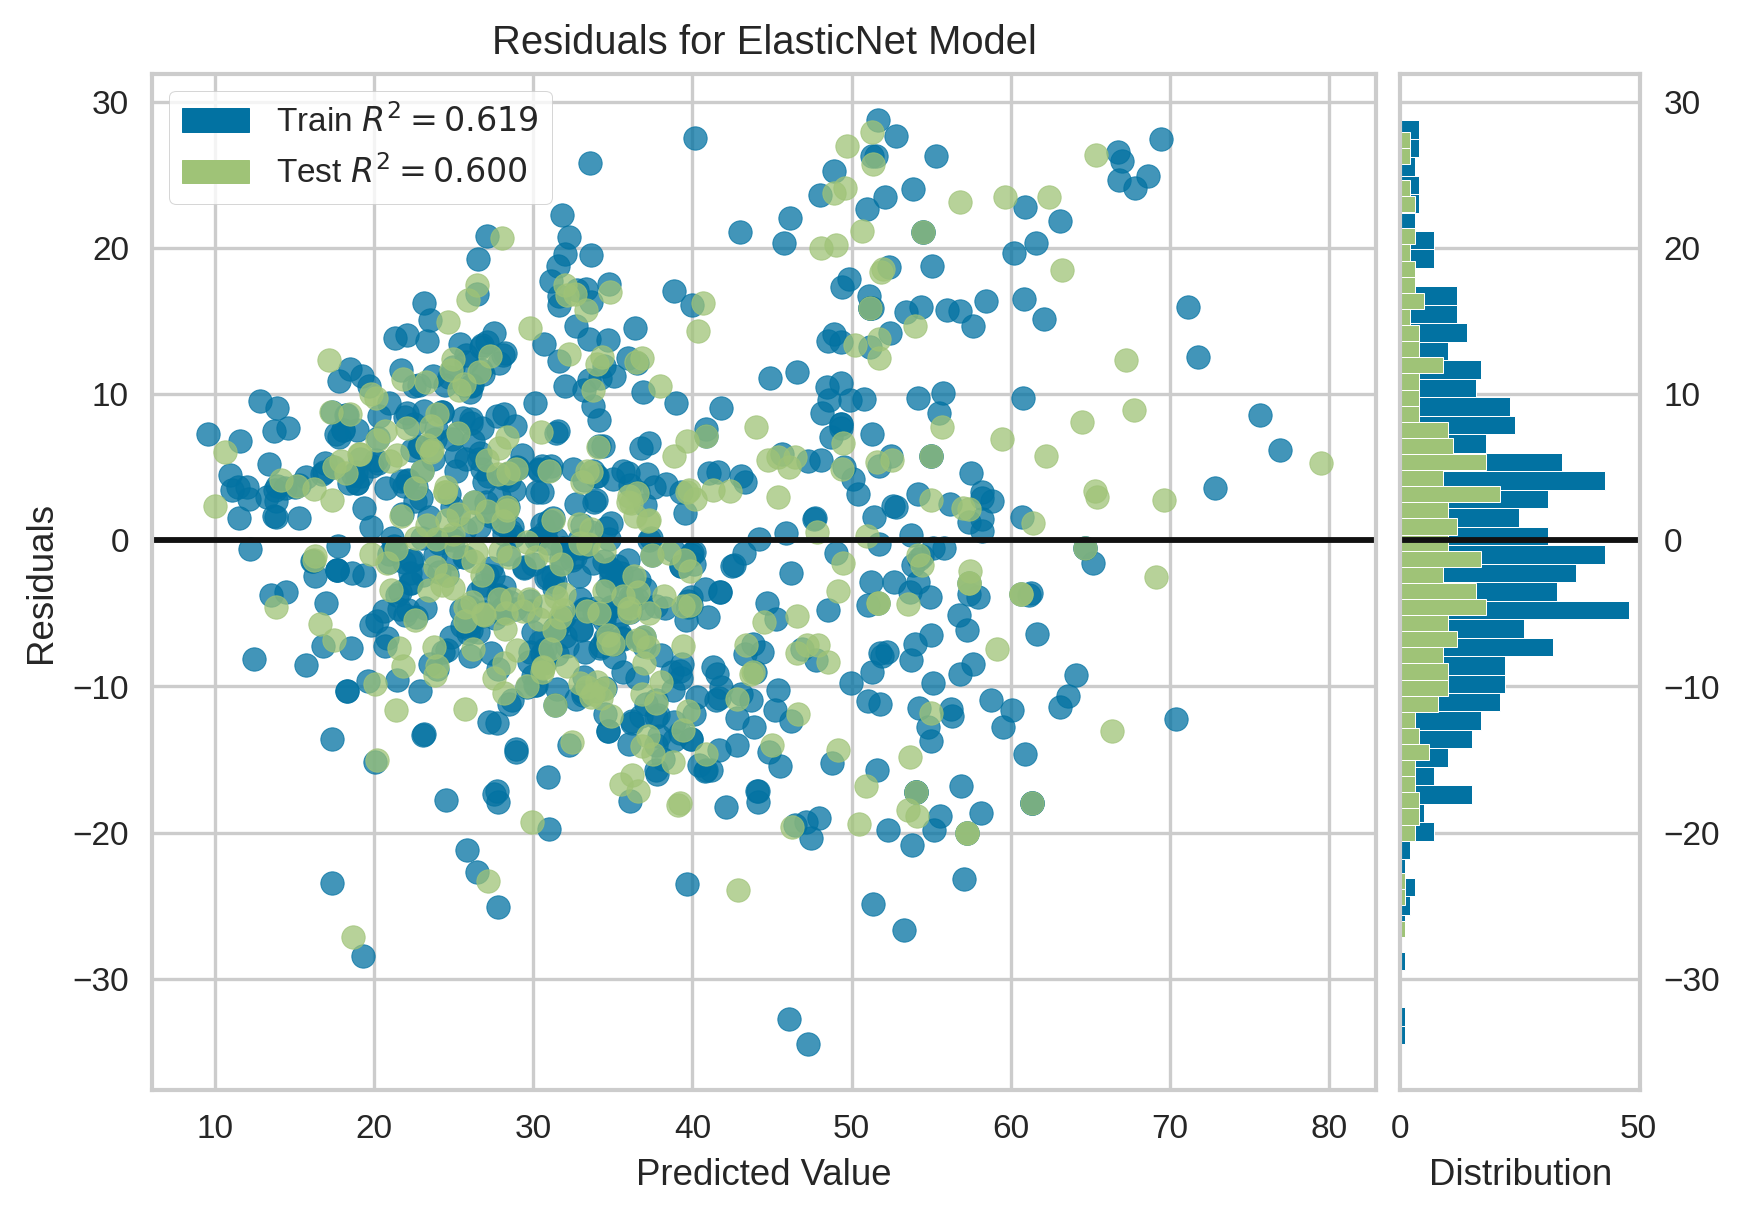

<Axes: title={'center': 'Residuals for ElasticNet Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
from sklearn.model_selection import train_test_split

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

# Instantiate the linear model and visualizer
model = ElasticNet(alpha=0.01)
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()

In [ ]:
df.head(10)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.029847
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.698299
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.447770
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.854291
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.289790


In [ ]:
kf = KFold(n_splits=10,shuffle=True,random_state=123)
scale = StandardScaler()

In [ ]:
pe = []
for alpha in np.arange(0.001,2.001,0.001):
  mse_test = []
  for idxtrain, idxtest in kf.split(X):
    xtrain = X[idxtrain]
    xtest = X[idxtest]
    xtrain = scale.fit_transform(xtrain)
    xtest = scale.transform(xtest)
    ytrain = y[idxtrain]
    ytest = y[idxtest]
    model = Ridge(alpha=0.01)
    model.fit(xtrain,ytrain)
    mse_test.append(mse(ytest,model.predict(xtest)))
  pe.append(np.mean(mse_test))

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Residuals')]

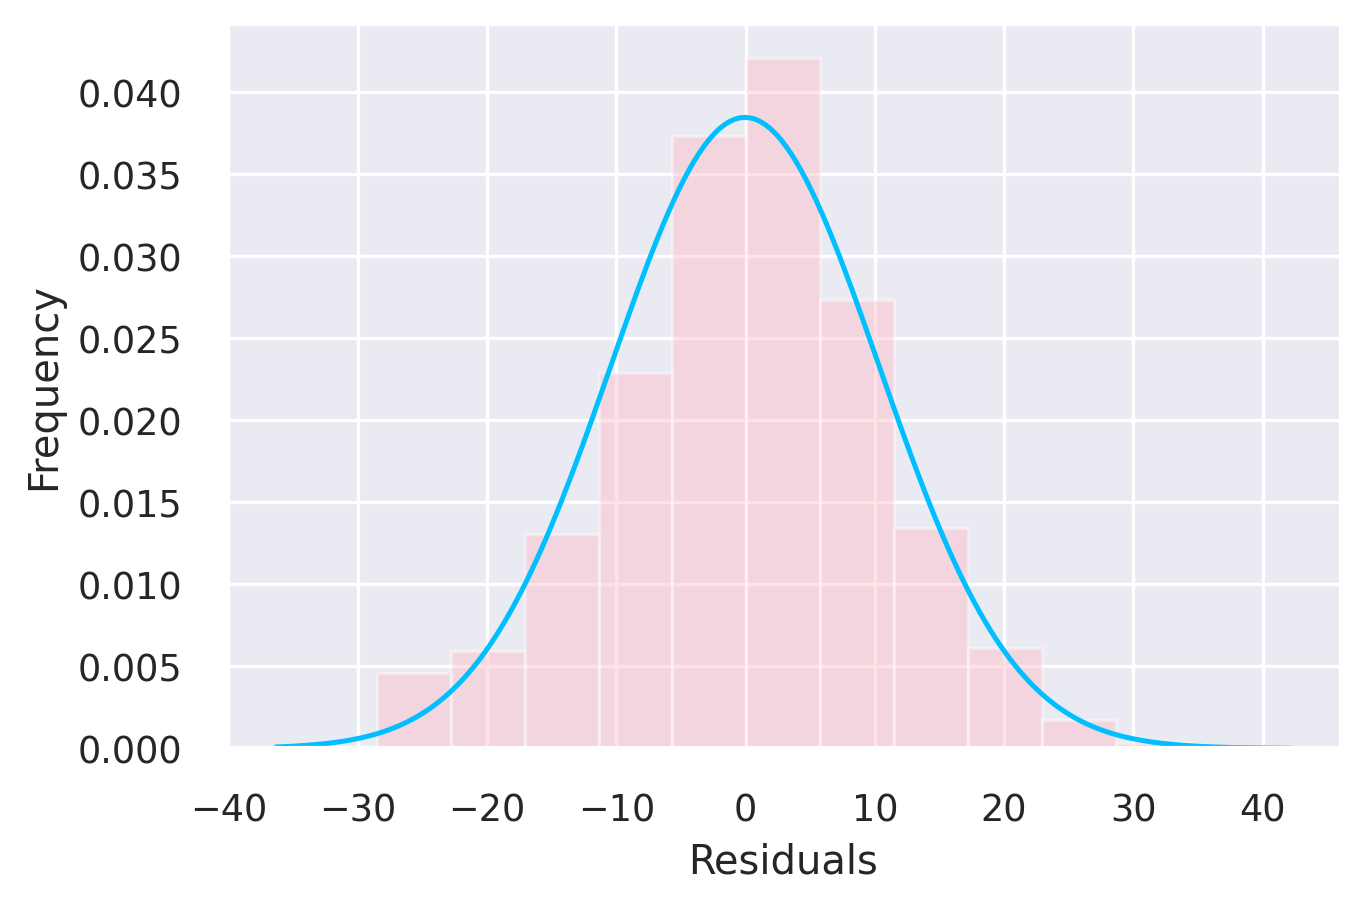

In [ ]:
ax1 = sns.distplot(residuals,

                  bins=11,
                  kde=False,
                  color='deepskyblue',
                  hist_kws={"color":'lightpink'},
                  fit=stats.norm,
                  fit_kws={"color":'deepskyblue'})
ax1.set(xlabel='Residuals', ylabel='Frequency')

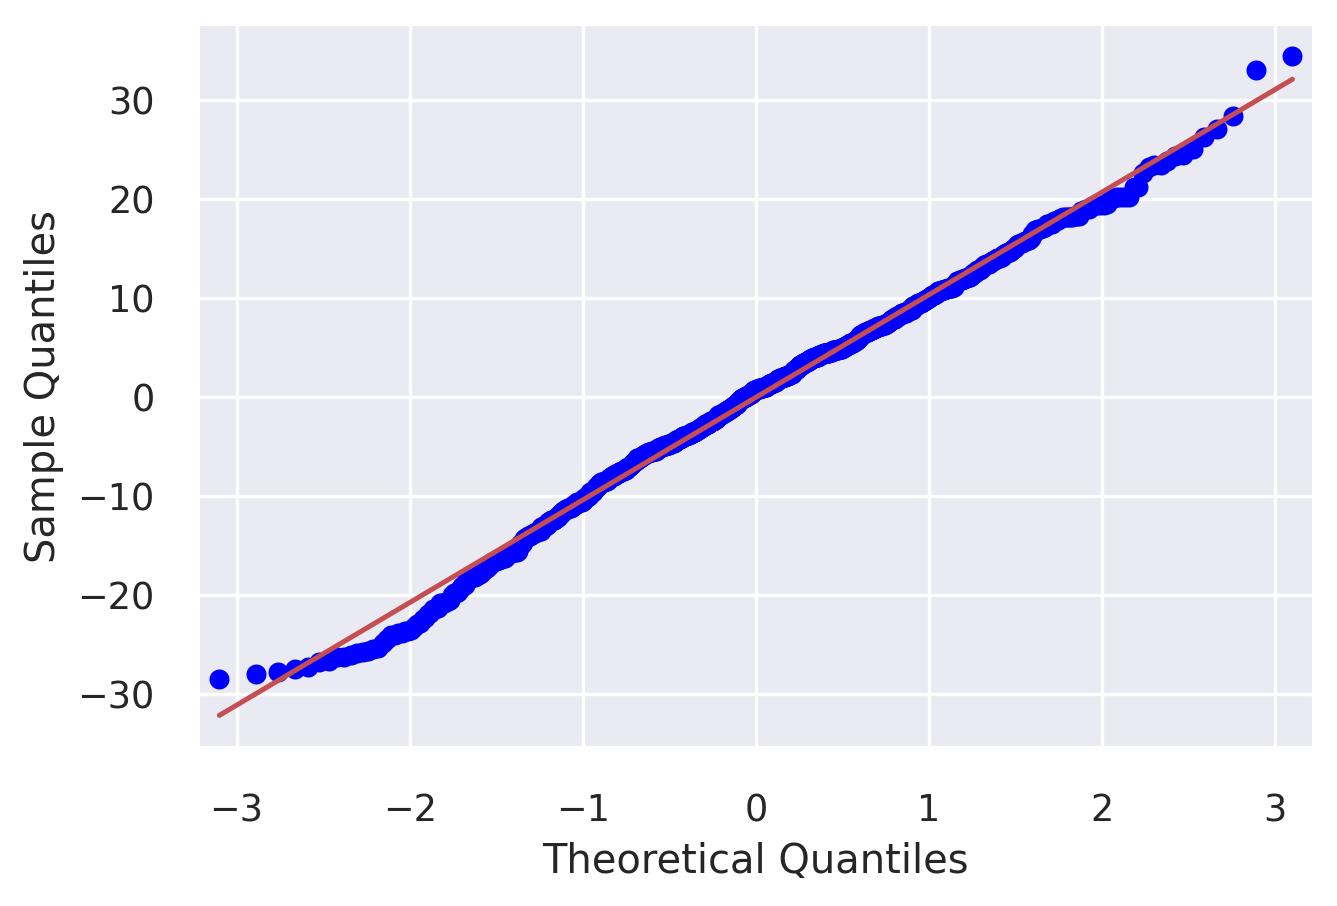

In [ ]:

sm.qqplot(residuals, loc = 0, scale = 1, line='s')
plt.show()

## <font color='blue'> Polynomial Regression</font>

<font color='slateblue'> Main idea: Linear combination of different powers of the feature values.

$$\large
P(x):= \beta_px^p+\beta_{p-1}x^{p-1}+...+\beta_1x+\beta_0
$$

IMPORTANT: P(x) is nonlinear in x. However if x is fixed (x is your data) and $\beta$ is the input we have
$$\large
L(\beta):= \beta_px^p+\beta_{p-1}x^{p-1}+...+\beta_1x+\beta_0
$$

is linear in $\beta$


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

## Example in 1-D

$$\large p(x) = \frac{1}{4}x^3-\frac{3}{2}x^2+x$$

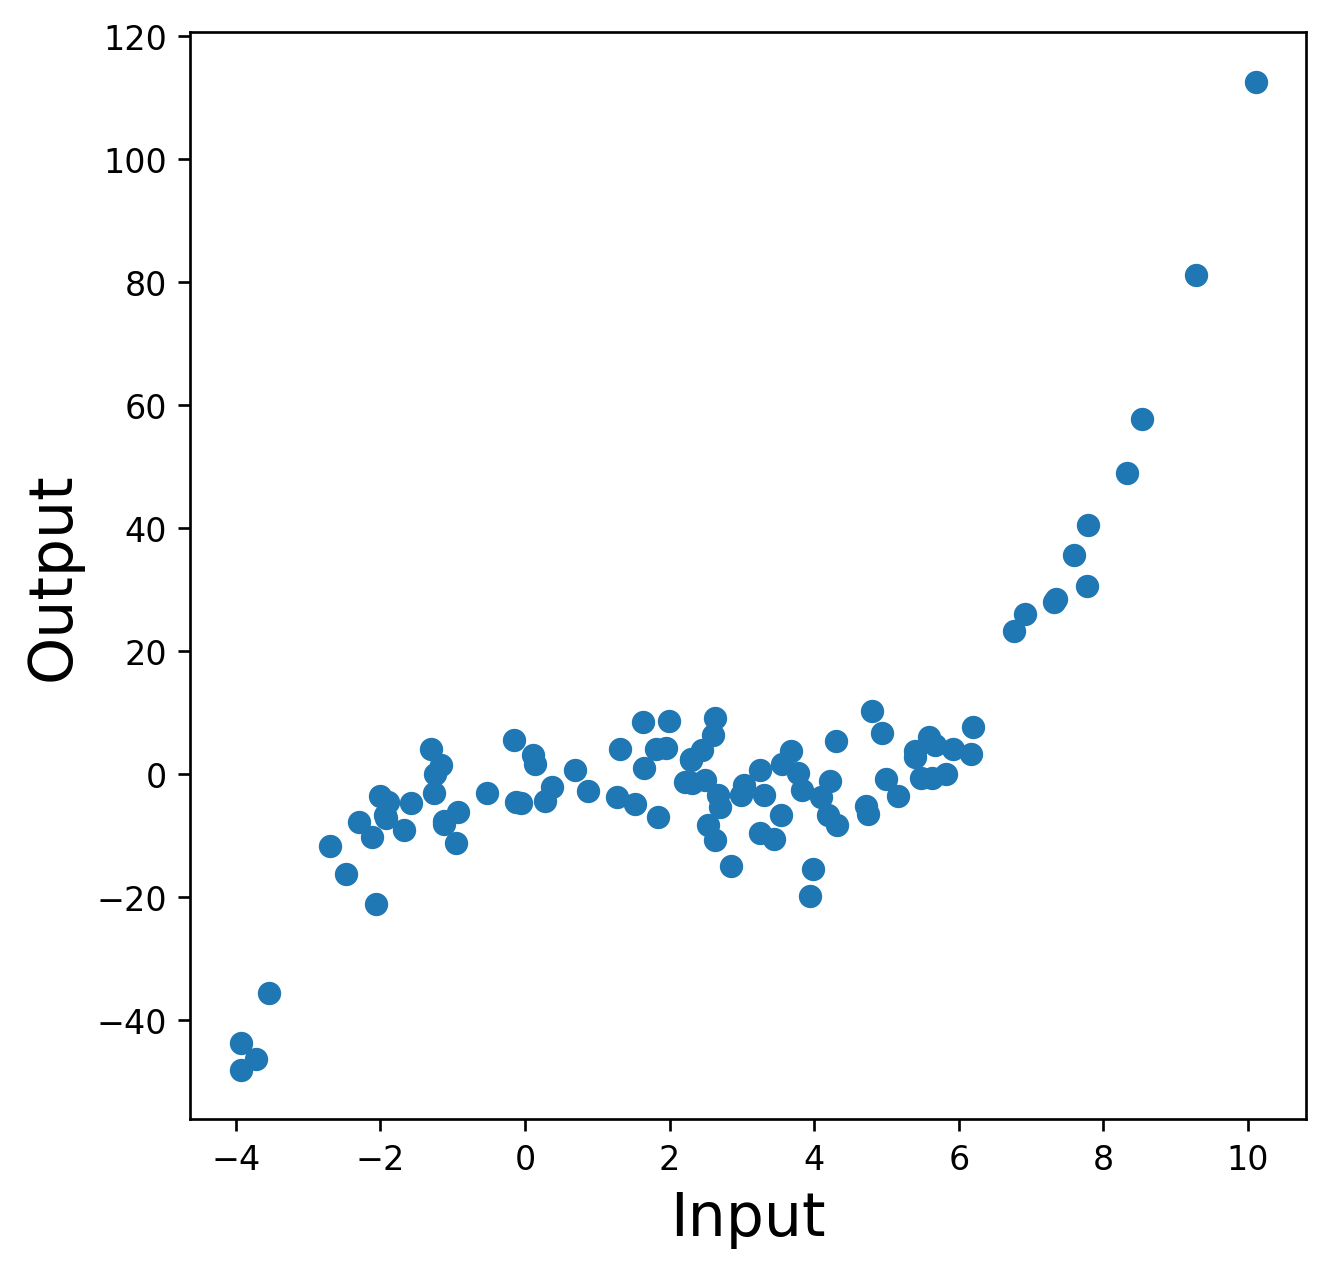

In [ ]:
np.random.seed(1693)
x = 2 - 3 * np.random.normal(0, 1, 100) # this means non-equally spaced values
y = x - 1.5 * (x ** 2) + 0.25 * (x ** 3) + 5*np.random.normal(loc=0,scale=1,size=100) # we generate a cubic relationship between x and y
plt.figure(figsize=(6,6))
plt.scatter(x,y)
plt.xlabel('Input',fontsize=18)
plt.ylabel('Output',fontsize=18)
plt.show()

### <font color='fuchsia'> Is a straight line a good idea for capturing the aspect?

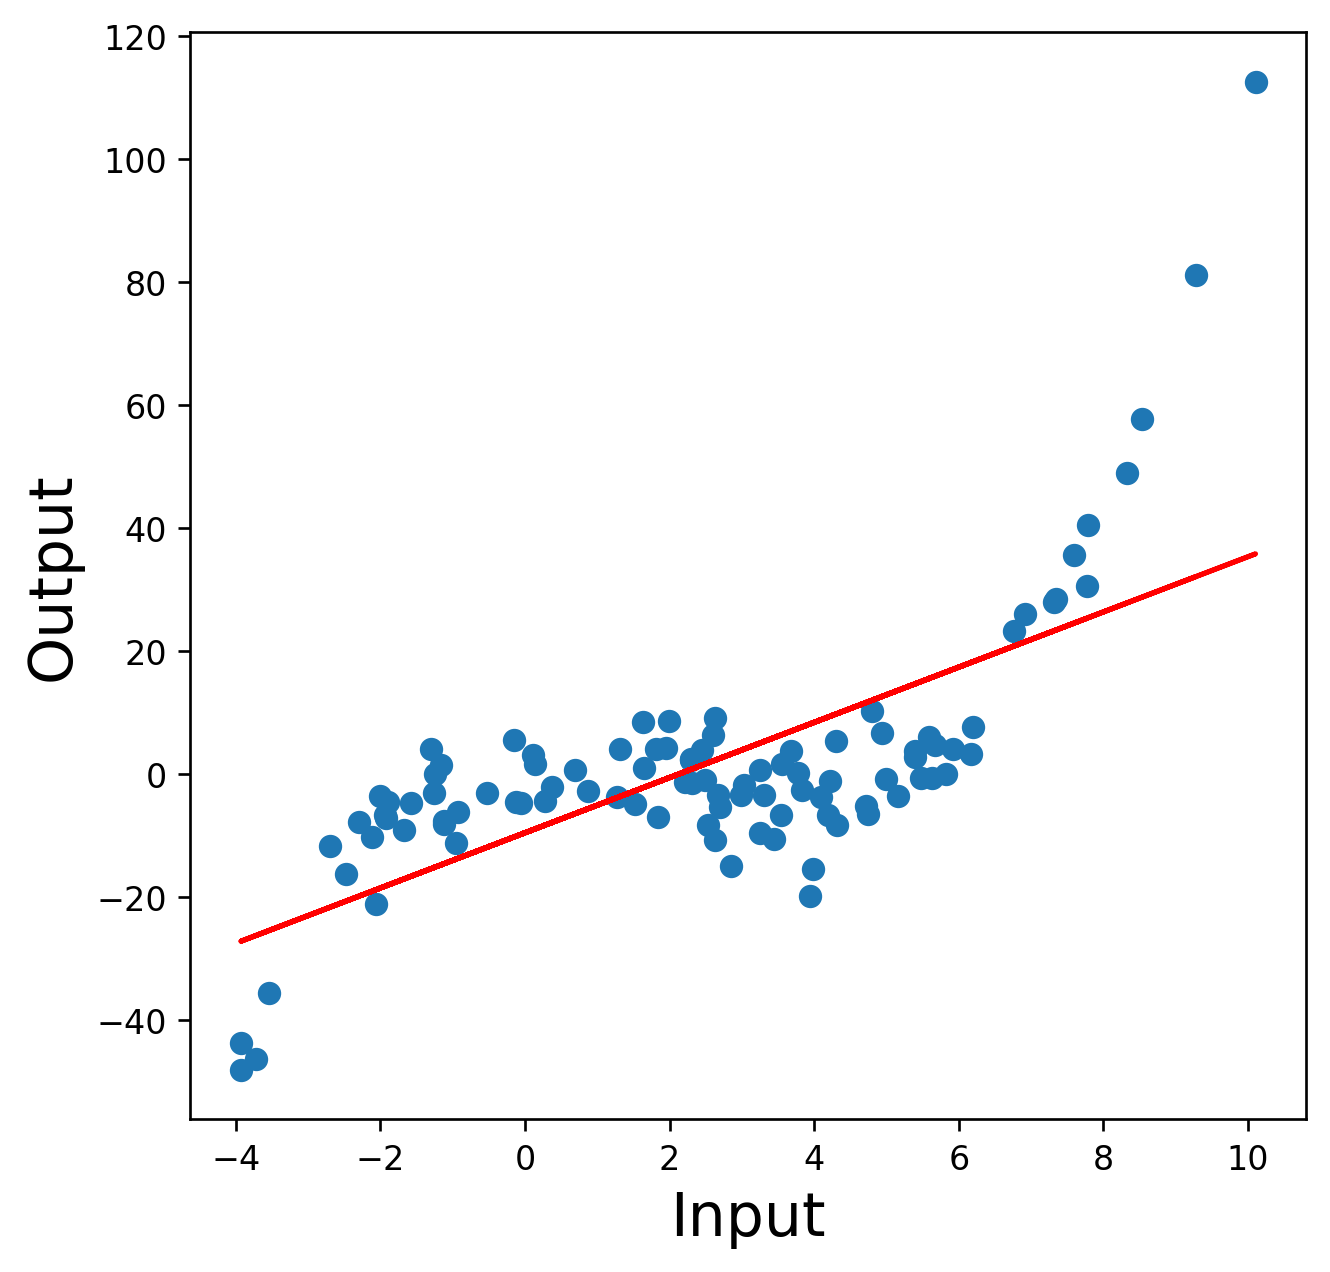

In [ ]:
from sklearn import linear_model
lm = linear_model.LinearRegression()

model = lm.fit(x.reshape((-1,1)),y)
y_pred = lm.predict(x.reshape((-1,1)))
plt.figure(figsize=(6,6))
plt.scatter(x, y)
plt.plot(x, y_pred, '-',color='r')
plt.xlabel('Input',fontsize=18)
plt.ylabel('Output',fontsize=18)
plt.show()

In [ ]:
import operator
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

5.369973037195503
0.9332479212313307


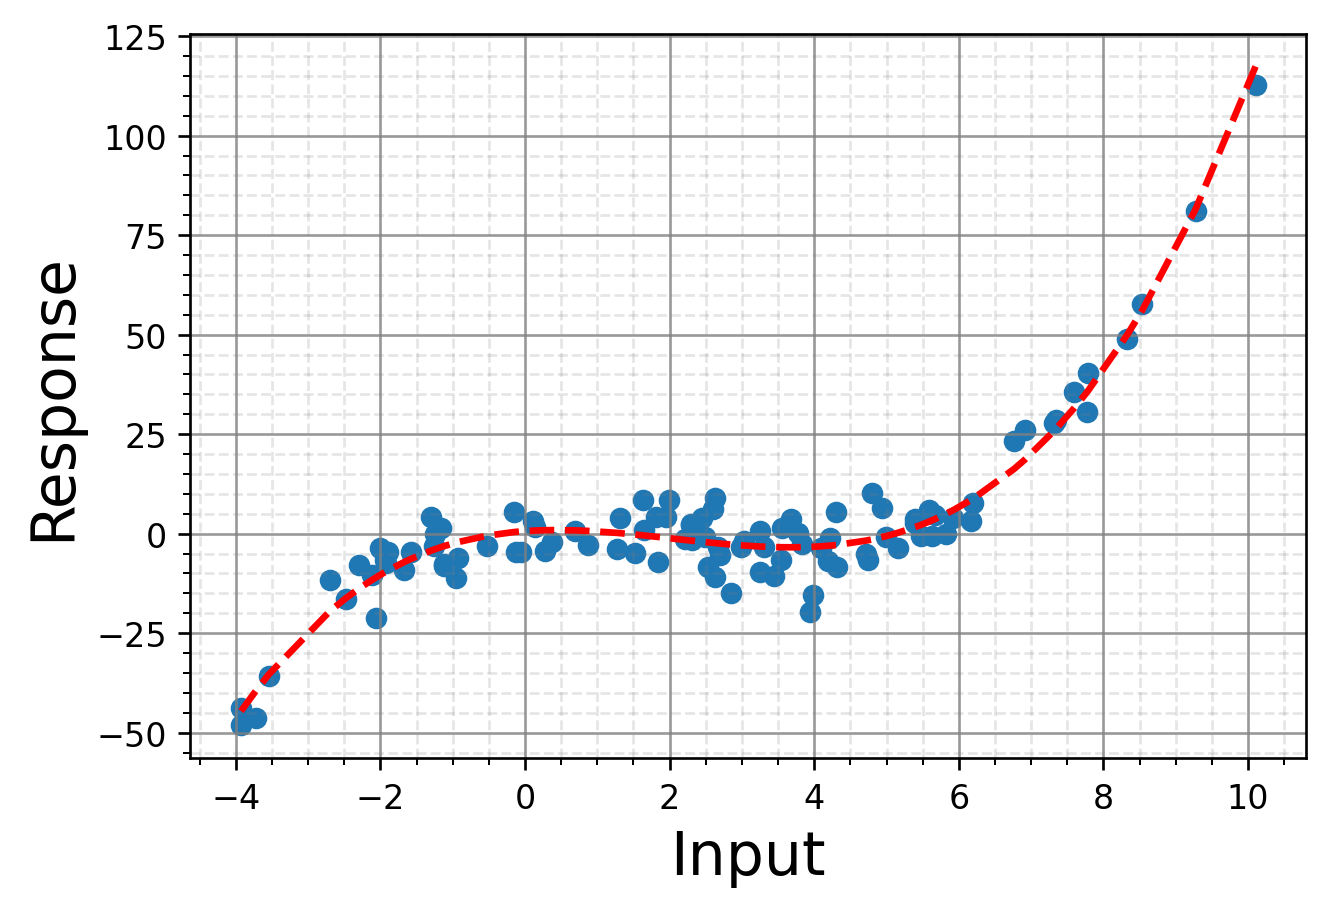

<Figure size 720x720 with 0 Axes>

In [ ]:
np.random.seed(1693)
x = 2 - 3 * np.random.normal(0, 1, 100)

def f(x):
    sz = len(x)
    return x - 1.5 * (x ** 2) + 0.25 * (x ** 3) + 5 * np.random.normal(loc=0, scale=1, size=sz)

y = f(x)

polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(x.reshape((-1,1)))

# the model created is linear in weights
model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)

fig, ax = plt.subplots()
plt.figure(figsize=(6,6))
ax.scatter(x, y, s=30)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
ax.plot(x, y_poly_pred, color='r',linestyle='--',lw=2)
ax.set_xlabel('Input',fontsize=18)
ax.set_ylabel('Response',fontsize=18)
ax.grid(which='major', color ='grey', linestyle='-', alpha=0.8)
ax.grid(which='minor', color ='grey', linestyle='--', alpha=0.2)
ax.minorticks_on()
plt.show()

In [ ]:
model.coef_

array([ 0.        ,  1.26204772, -1.59419899,  0.25857094])

In [ ]:
pd.DataFrame(x_poly)

,0,1,2,3,4
0,1.0,4.741352,22.480420,106.587590,505.369302
1,1.0,3.554897,12.637292,44.924268,159.701140
2,1.0,0.105749,0.011183,0.001183,0.000125
3,1.0,1.626725,2.646233,4.304692,7.002549
4,1.0,3.252754,10.580411,34.415480,111.945106
...,...,...,...,...,...
95,1.0,-1.257303,1.580812,-1.987560,2.498966
96,1.0,3.685663,13.584110,50.066446,184.528032
97,1.0,3.253514,10.585350,34.439581,112.049645
98,1.0,-3.928013,15.429287,-60.606442,238.062900


##<font color='blue'> Non-Linear that is not exactly a polynomial: A noisy sine wave</font>

In [ ]:
x = np.linspace(0,3.14,50)
epsilon = np.random.normal(scale=0.2,size=x.shape)
y = np.sin(4*x) + epsilon

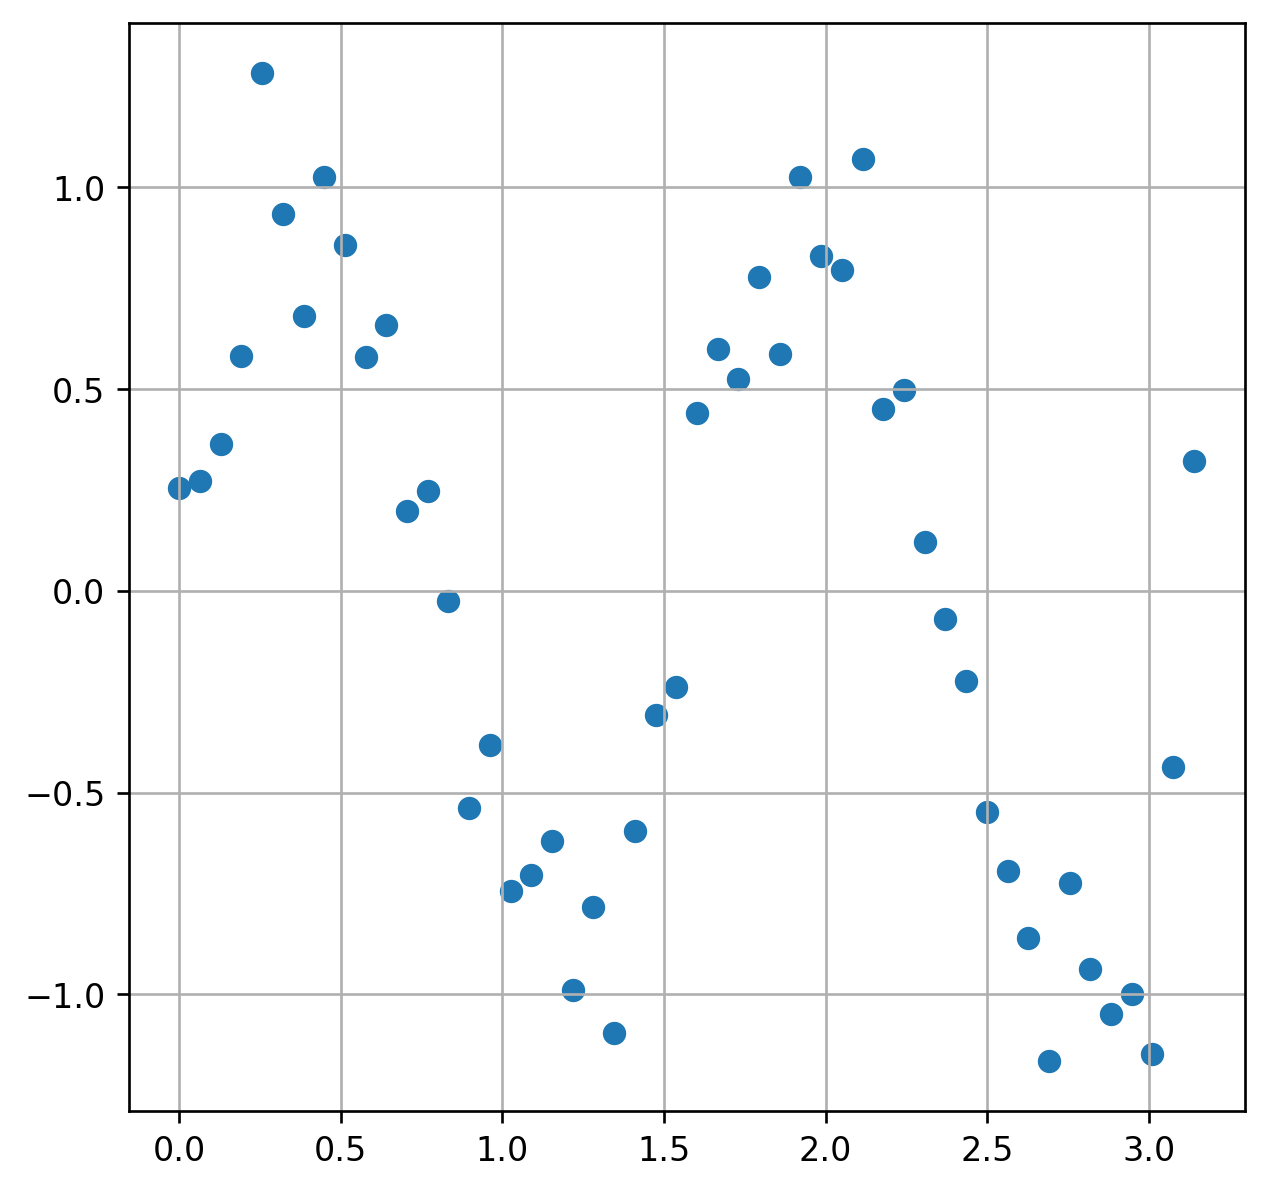

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(x,y)
plt.grid(True)

In [ ]:
polynomial_features= PolynomialFeatures(degree=6)
x_poly = polynomial_features.fit_transform(x.reshape(-1,1))

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
#print(rmse)
print(r2)

0.8682951727629472


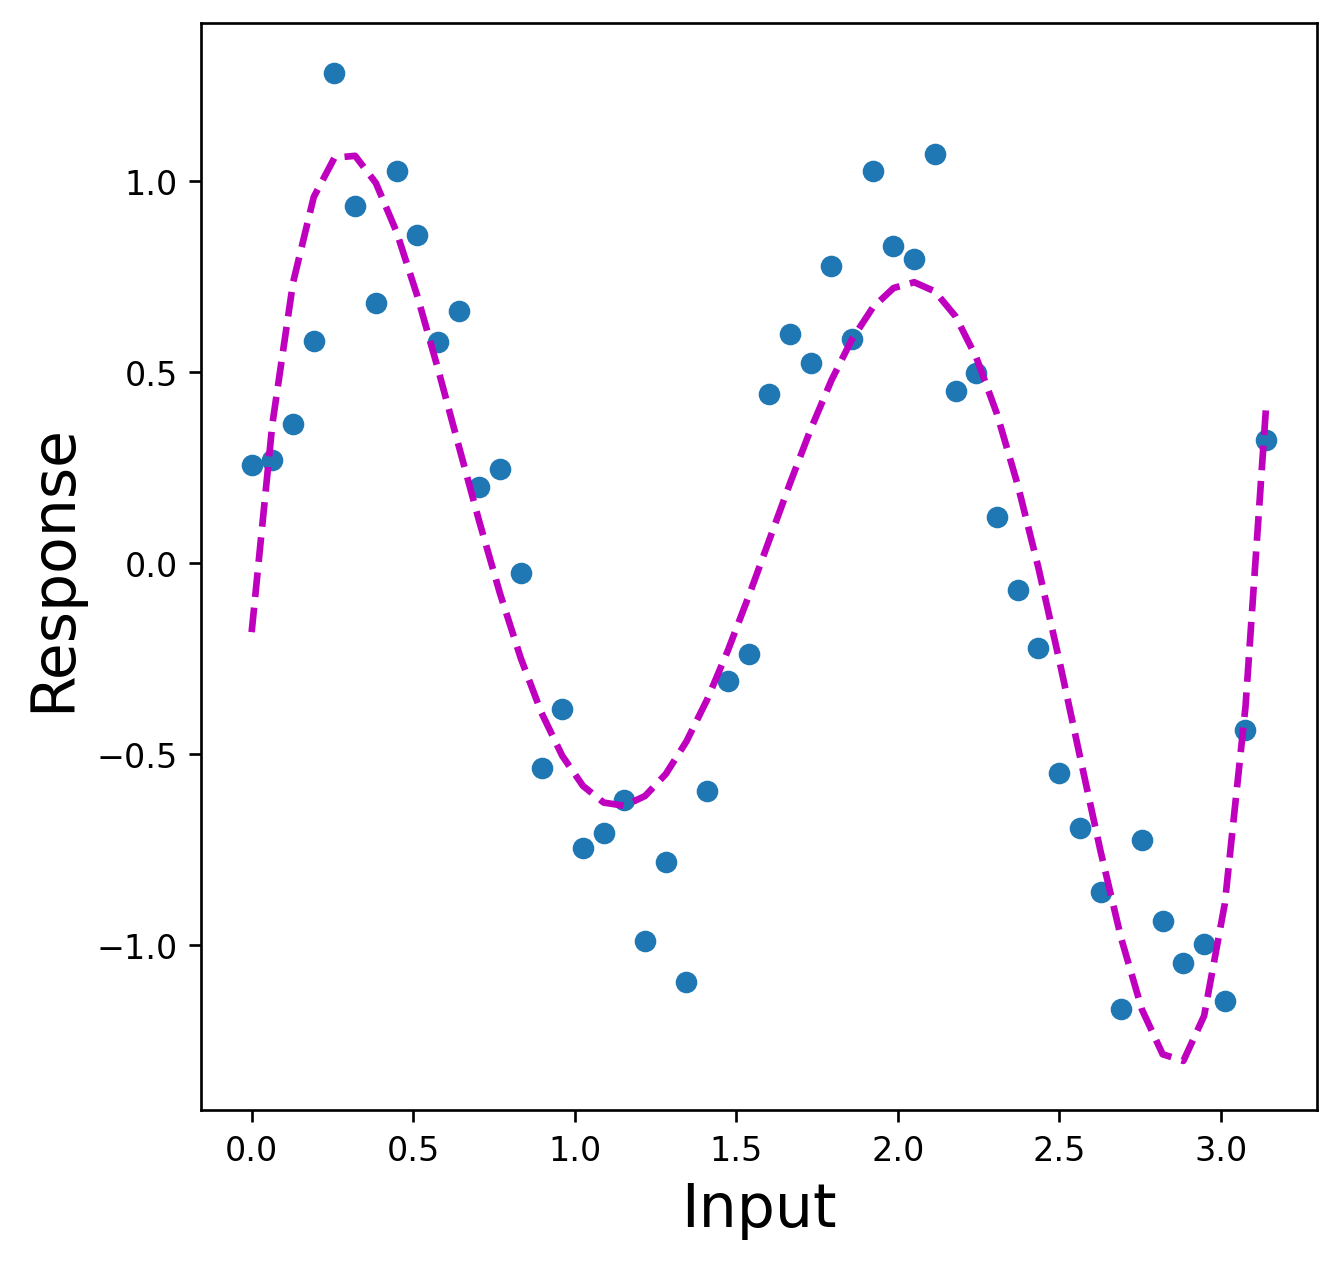

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(x, y, s=30)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m',linestyle='--',lw=2)
plt.xlabel('Input',fontsize=18)
plt.ylabel('Response',fontsize=18)
plt.show()

## <font color='blue'> How do we know we are on the right track?

  - Use Train and Test Sets
  - Use Regularization.
  - Compute (R)MSE on the test set.
  - Compute the coefficient of determination on the test set.
  - Determine the normality of the residuals by using a test statistic (such as Shapiro-Wilk or Kolmogorov-Smirnov), density plots and *quantile-quantile* plots.


##<font color= 'blue'> Model Validation via k-Fold Cross-Validations</font>

In order to compare the predictive power of different models we use K-fold cross-validation.

Example schematic of 5-fold cross-validation:

<figure>
<center>
<img src='https://drive.google.com/uc?id=1AMSDtgJ-ADYjWFbHCdumvIGqUsmKSzdW'
width='550px' />
<figcaption>Step 1 in the 5-fold cross-validation</figcaption></center>
</figure>

